# **Análisis Exploratorio Trabajo de Grado Presentado por:** Manuel Fabian Sarmiento Marquez

## **1. Contexto del Análisis**

Equipos y Controles Industriales ECI es un proveedor integral de tecnología industrial con un portafolio amplio de productos tales como válvulas, instrumentos de medición, analizadores de proceso, equipos para calibración y avanzados sistemas de control, también ofrecemos servicios “clase mundo” en ingeniería, instalación, configuración y puesta en marcha, así como servicios de mantenimiento para preservar el valor de la inversión durante el ciclo de vida de la planta.  

ECI tiene total cobertura nacional con oficinas en Barrancabermeja, Barranquilla, Bogotá, Cali, Cartagena y Medellín y centros de servicio en Barrancabermeja y Bogotá.  A nivel regional cuenta con oficinas en Ecuador en las ciudades de Quito y Esmeraldas, y desde 1978 cuenta con oficina logística en Miami.

## **2. Caracteristicas de la base de datos:**



Diccionario de datos

Tipoventas	:	Tipoventas

Numerodocumento	:	Numerodocumento

NumeroOriginal	:	NumeroOriginal

Fechadocumento	:	Fechadocumento

Numeroarticulo	:	Numeroarticulo

Descripcionarticulo	:	Descripcionarticulo

DescripcionGenerica	:	DescripcionGenerica

CodigoMarca	:	CodigoMarca

Marca	:	Marca

CodigoLinea	:	CodigoLinea

Linea	:	Linea

Numerocliente	:	Numerocliente

Nombrecliente	:	Nombrecliente

OCCLIENTE	:	OCCLIENTE

ClaseCliente	:	ClaseCliente

Secteconomico	:	Secteconomico

Dpto	:	Dpto

Departamento	:	Departamento

Estadoanulado	:	Estadoanulado

Estadodocumentoventas	:	Estadodocumentoventas

IdVendedor	:	IdVendedor

Vendedor	:	Vendedor

Mes	:	Mes

Cantidad	:	Cantidad

Preciounitario	:	Preciounitario

Precioextendido	:	Precioextendido

CostoUnitario	:	CostoUnitario

CostoExtendido	:	CostoExtendido

Empresa	:	Empresa

fechaVencimiento	:	fechaVencimiento

usuarioGp	:	usuarioGp

Ciudad	:	Ciudad

EstadoDepartamento	:	EstadoDepartamento

Pais	:	Pais

PRSTADCD	:	PRSTADCD

FechaRequerida	:	FechaRequerida

MonedaOriginal	:	MonedaOriginal

valorUnitarioMonedaOriginal	:	valorUnitarioMonedaOriginal

Moneda	:	Moneda

DireccionFacturacion	:	DireccionFacturacion

MetodoEntrega	:	MetodoEntrega

CondicionesPago	:	CondicionesPago

CREATDDT	:	CREATDDT


## **3. Carga de librerias y del dataset:**

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from locale import normalize


from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose # descomposición de series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # Holwinters simple
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holwinters doble y tripe
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#!pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab as py
from datetime import datetime

#!pip install install bayesian-optimization
from bayes_opt import BayesianOptimization
import warnings

In [221]:
df=pd.read_csv('eci_Pedidos_Reales.csv', delimiter=';', low_memory=False)
df.head(5)

2  P61DIS-2024-0527  C61DIS-2024-0561  2024-04-30 00:00:00.000  13302-0201  \
0  2  P61DIS-2024-0526  C61DIS-2024-0560  2024-04-30 00:00:00.000     104-137   
1  2  P21DCC-2024-0207  C21DCC-2024-0570  2024-04-30 00:00:00.000    184-313S   
2  2  P21DCC-2024-0211  C21DCC-2024-0613  2024-04-30 00:00:00.000  500-196-30   
3  2  P21DCC-2024-0212  C21DCC-2024-0492  2024-04-30 00:00:00.000  500-197-30   
4  2  P21DCC-2024-0213  C21DCC-2024-0208  2024-04-30 00:00:00.000     187-901   

                   CÁMARA TERMOGRÁFICA  FLIR  E6 PRO  \
0              MICROMETRO DE EXTERIORES  0-6"/0.001"   
1                         GALGAS EPESORES 0.05mm-1mm   
2  CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...   
3  CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm...   
4    TRANSPORTADOR UNIVERSAL DE ANGULOS  150mm/300mm   

                 CÁMARA TERMOGRÁFICA  FLIR  E6 PRO.1  22-12  \
0              MICROMETRO DE EXTERIORES  0-6"/0.001"  21-01   
1                         GALGAS EPESORES 0.05mm-1mm  21-01   
2  CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...  21-01   
3  CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm...  21-01   
4    TRANSPORTADOR UNIVERSAL DE ANGULOS  150mm/300mm  21-01   

  Flir -  Infrarojos para Medición de Temperatura  2212-02  ...  \
0             Mitutoyo -  Small Tools - Línea Uno  2101-01  ...   
1             Mitutoyo -  Small Tools - Línea Uno  2101-01  ...   
2             Mitutoyo -  Small Tools - Línea Uno  2101-01  ...   
3             Mitutoyo -  Small Tools - Línea Uno  2101-01  ...   
4             Mitutoyo -  Small Tools - Línea Uno  2101-01  ...   

  COLOMBIA                                                       \
0  COLOMBIA                                      ...              
1  COLOMBIA                                      ...              
2  COLOMBIA                                      ...              
3  COLOMBIA                                      ...              
4  COLOMBIA                                      ...              

   PRINCIPAL       2024-04-30 00:00:00.000.2 12528676.00000 12528676.00000.1  \
0  PRINCIPAL         2024-06-30 00:00:00.000     2729929.80       1364964.90   
1  PRINCIPAL         2024-04-30 00:00:00.000      872140.28        436070.14   
2  PRINCIPAL         2024-04-30 00:00:00.000     1596268.00        798134.00   
3  PRINCIPAL         2024-04-30 00:00:00.000     1149995.00       1149995.00   
4  PRINCIPAL         2024-04-30 00:00:00.000     3500364.00       1750182.00   

   $COL  PRINCIPAL  ENTREGA  30 DIAS  2024-04-30 00:00:00.000.3  
0  $COL  PRINCIPAL  ENTREGA  45 DIAS    2024-04-30 00:00:00.000  
1  $COL  PRINCIPAL  ENTREGA  45 DIAS    2024-04-30 00:00:00.000  
2  $COL  PRINCIPAL  ENTREGA  30 DIAS    2024-04-30 00:00:00.000  
3  $COL  PRINCIPAL  ENTREGA  CONTADO    2024-04-30 00:00:00.000  
4  $COL  PRINCIPAL  ENTREGA  30 DIAS    2024-04-30 00:00:00.000  

[5 rows x 43 columns]

## **4. Análisis del Dataset**

### Análisis General:

In [222]:
# Forma del dataframe (filas, columnas)
df.shape

(211643, 43)

In [223]:
df.columns = ['Tipoventas', 'Numerodocumento', 'NumeroOriginal', 'Fechadocumento',
       'Numeroarticulo', 'Descripcionarticulo', 'DescripcionGenerica',
       'CodigoMarca', 'Marca', 'CodigoLinea', 'Linea', 'Numerocliente',
       'Nombrecliente', 'OCCLIENTE', 'ClaseCliente', 'Secteconomico', 'Dpto',
       'Departamento', 'Estadoanulado', 'Estadodocumentoventas', 'IdVendedor',
       'Vendedor', 'Mes', 'Cantidad', 'Preciounitario', 'Precioextendido',
       'CostoUnitario', 'CostoExtendido', 'Empresa', 'fechaVencimiento',
       'usuarioGp', 'Ciudad', 'EstadoDepartamento', 'Pais', 'PRSTADCD',
       'FechaRequerida', 'MonedaOriginal', 'valorUnitarioMonedaOriginal',
       'Moneda', 'DireccionFacturacion', 'MetodoEntrega', 'CondicionesPago',
       'CREATDDT']

In [224]:
df = df[['Fechadocumento','Descripcionarticulo','Marca','Cantidad']]

In [225]:
# Nombre de variables
df.columns

Index(['Fechadocumento', 'Descripcionarticulo', 'Marca', 'Cantidad'], dtype='object')

In [226]:
# Tipo de datos
df.dtypes

Fechadocumento         object
Descripcionarticulo    object
Marca                  object
Cantidad                int64
dtype: object

In [227]:
#Análisis descriptivo de variables numéricas
df.describe()

Cantidad
count  2.116430e+05
mean   8.967308e+00
std    2.825830e+03
min    0.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    2.000000e+00
max    1.300000e+06

In [228]:
#Análisis descriptivo de variables categóricas para ver cuáles son valores cualitativos más recurrentes:
df.describe(include = 'object').T

count unique                                  top   freq
Fechadocumento       211643   5161              2018-09-10 00:00:00.000    422
Descripcionarticulo  211259  29560                             SERVICIO   6212
Marca                198186    107  Mitutoyo -  Small Tools - Línea Uno  73613

In [229]:
#Revisando número de valores únicos por variable
df.nunique()

Fechadocumento          5161
Descripcionarticulo    29560
Marca                    107
Cantidad                 178
dtype: int64

In [230]:
#Verificando datos nulos
df.isnull().sum()

Fechadocumento             0
Descripcionarticulo      384
Marca                  13457
Cantidad                   0
dtype: int64

In [231]:
#Dimensionando a nivel porcentual a cuánto, del total de los datos, corresponden los datos nulos
df.isnull().sum()/len(df)*100

Fechadocumento         0.000000
Descripcionarticulo    0.181438
Marca                  6.358349
Cantidad               0.000000
dtype: float64

### Tratamiento de datos nulos y Duplicados:

In [232]:
Marcas = df.Marca.unique()
df_marcas = pd.DataFrame(Marcas)
df_marcas.to_csv('Marcas.csv', index=False)
df_marcas

0
0    Mitutoyo -  Small Tools - Línea Uno
1    Servicios Laboratorio de Metrologia
2                                 Krohne
3                   MTL Instrumens Group
4                             Limitorque
..                                   ...
103               El-O-Matic NO UTILIZAR
104        Faro Technologies NO UTILIZAR
105                              Oneprod
106                 Creaform NO UTILIZAR
107                          Henry Pratt

[108 rows x 1 columns]

In [233]:
Productos = df.Descripcionarticulo.unique()
df_Productos = pd.DataFrame(Productos)
df_Productos.to_csv('Marcas.csv', index=False)
df_Productos

0
0                  MICROMETRO DE EXTERIORES  0-6"/0.001"
1                             GALGAS EPESORES 0.05mm-1mm
2      CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...
3      CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm...
4        TRANSPORTADOR UNIVERSAL DE ANGULOS  150mm/300mm
...                                                  ...
29556         VALVULA DE  BOLA DE 3" ANSI 300. MARCA WKM
29557                                   SOFTWARE Y CABLE
29558                         MODULO PARA SEÑAL LUMINOSA
29559                         FUENTE DE PODER REDUNDANTE
29560                          OPERATION OVERRIDE SYSTEM

[29561 rows x 1 columns]

In [234]:
#se eliminan datos nullos  así como los valores en blanco, los valores correspondientes a servicios y los valores de Laboratorio
df = df.dropna(subset = ['Marca'])
df = df.dropna(subset = ['Descripcionarticulo'])
df = df[df['Marca']!='']


In [235]:
df.isnull().sum()/len(df)*100

Fechadocumento         0.0
Descripcionarticulo    0.0
Marca                  0.0
Cantidad               0.0
dtype: float64

### Preparación de columnas para análisis:

In [236]:
df_final = df
df_final['Fechadocumento'] = pd.to_datetime(df['Fechadocumento'])
#df_final.set_index('Fechadocumento', inplace=True)
df_final.head(5)

Fechadocumento                                Descripcionarticulo  \
0     2024-04-30              MICROMETRO DE EXTERIORES  0-6"/0.001"   
1     2024-04-30                         GALGAS EPESORES 0.05mm-1mm   
2     2024-04-30  CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...   
3     2024-04-30  CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm...   
4     2024-04-30    TRANSPORTADOR UNIVERSAL DE ANGULOS  150mm/300mm   

                                 Marca  Cantidad  
0  Mitutoyo -  Small Tools - Línea Uno         2  
1  Mitutoyo -  Small Tools - Línea Uno         2  
2  Mitutoyo -  Small Tools - Línea Uno         2  
3  Mitutoyo -  Small Tools - Línea Uno         1  
4  Mitutoyo -  Small Tools - Línea Uno         2

### Análisis Univariado:

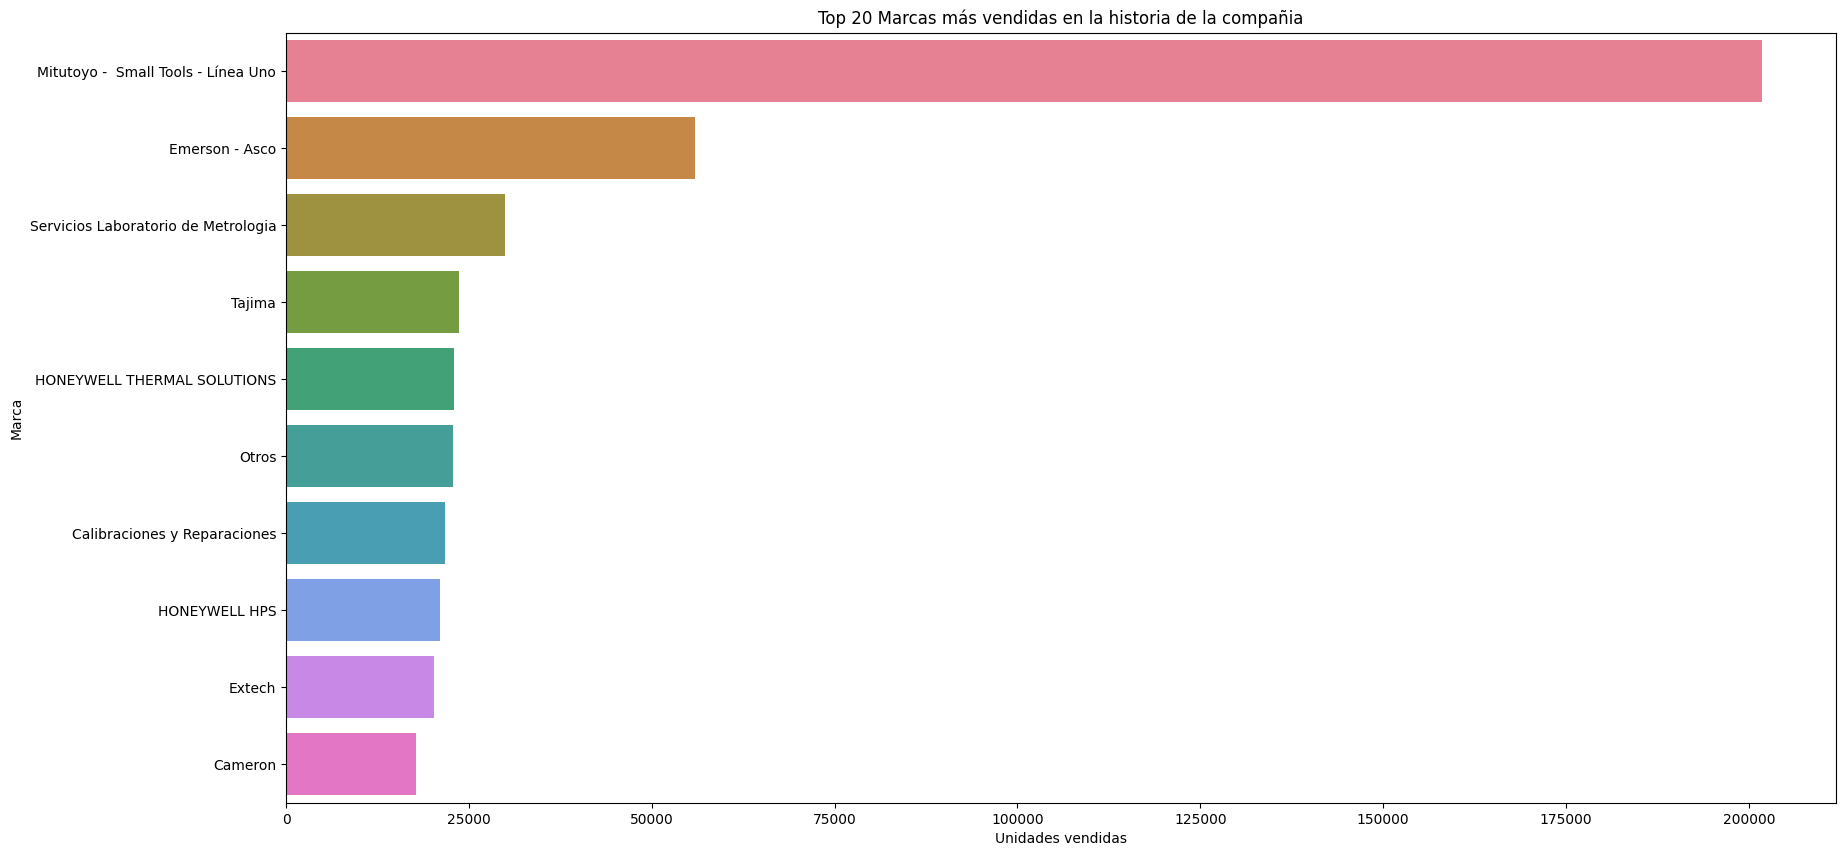

In [237]:
Marcas=df_final.groupby(['Marca'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad'],ascending=False)[:10]

plt.figure(figsize=(20,10))
sns.barplot(y = "Marca", x = 'Cantidad', data = Marcas, palette= "husl")
plt.title("Top 20 Marcas más vendidas en la historia de la compañia")
plt.xlabel("Unidades vendidas")
plt.ylabel("Marca")
plt.show()

In [238]:
df_final = df_final[df_final['Marca'] =='Mitutoyo -  Small Tools - Línea Uno']
df_final = df_final[['Fechadocumento','Descripcionarticulo','Cantidad']]
df_final

Fechadocumento                                Descripcionarticulo  \
0          2024-04-30              MICROMETRO DE EXTERIORES  0-6"/0.001"   
1          2024-04-30                         GALGAS EPESORES 0.05mm-1mm   
2          2024-04-30  CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...   
3          2024-04-30  CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm...   
4          2024-04-30    TRANSPORTADOR UNIVERSAL DE ANGULOS  150mm/300mm   
...               ...                                                ...   
211542     2004-01-06         COMPARADOR DE DIAMETROS INTERIORES 18-35mm   
211571     2003-12-15                              RELOJ COMPARADOR  2mm   
211620     2001-09-02               MICROMETRO DE EXTRIORES 3"-4"/0.001"   
211623     2001-04-25                 MEDIDOR DE ESPESORES 0.05"/0.0001"   
211633     1900-01-01                            JUEGO DE BLOQUES PATRON   

        Cantidad  
0              2  
1              2  
2              2  
3              1  
4              2  
...          ...  
211542         1  
211571         1  
211620         1  
211623         2  
211633         1  

[73610 rows x 3 columns]

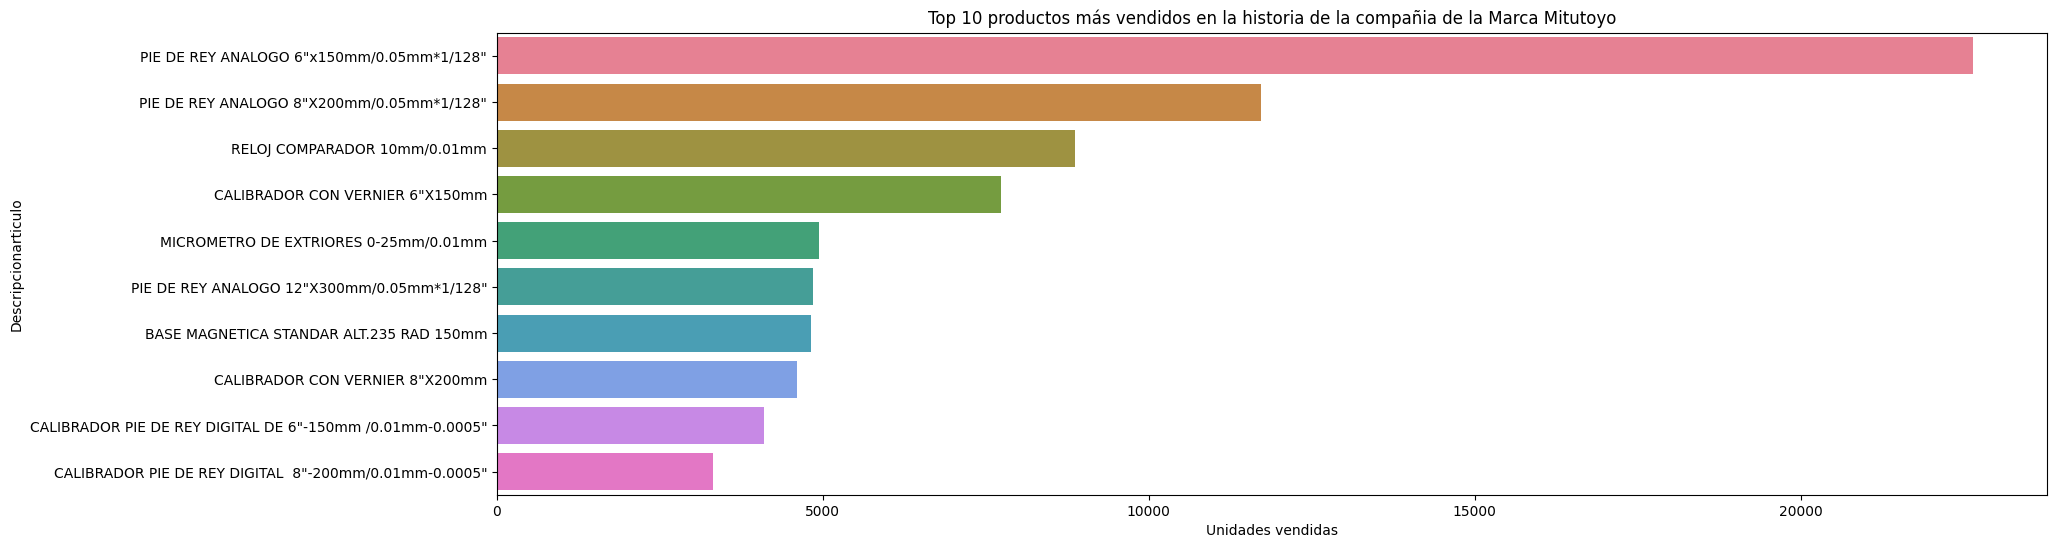

Descripcionarticulo  Cantidad
2050          PIE DE REY ANALOGO 6"x150mm/0.05mm*1/128"     22647
2052          PIE DE REY ANALOGO 8"X200mm/0.05mm*1/128"     11719
2382                       RELOJ COMPARADOR 10mm/0.01mm      8865
387                     CALIBRADOR CON VERNIER 6"X150mm      7729
1428              MICROMETRO DE EXTRIORES 0-25mm/0.01mm      4942
2042         PIE DE REY ANALOGO 12"X300mm/0.05mm*1/128"      4850
187            BASE MAGNETICA STANDAR ALT.235 RAD 150mm      4813
392                     CALIBRADOR CON VERNIER 8"X200mm      4604
562   CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...      4098
556   CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm...      3316

In [239]:
Mas_Vendidos=df_final.groupby(['Descripcionarticulo'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad'],ascending=False)[:10]

plt.figure(figsize=(20,6))
sns.barplot(y = "Descripcionarticulo", x = 'Cantidad', data = Mas_Vendidos, palette= "husl")
plt.title("Top 10 productos más vendidos en la historia de la compañia de la Marca Mitutoyo")
plt.xlabel("Unidades vendidas")
plt.ylabel("Descripcionarticulo")

plt.show()
Mas_Vendidos

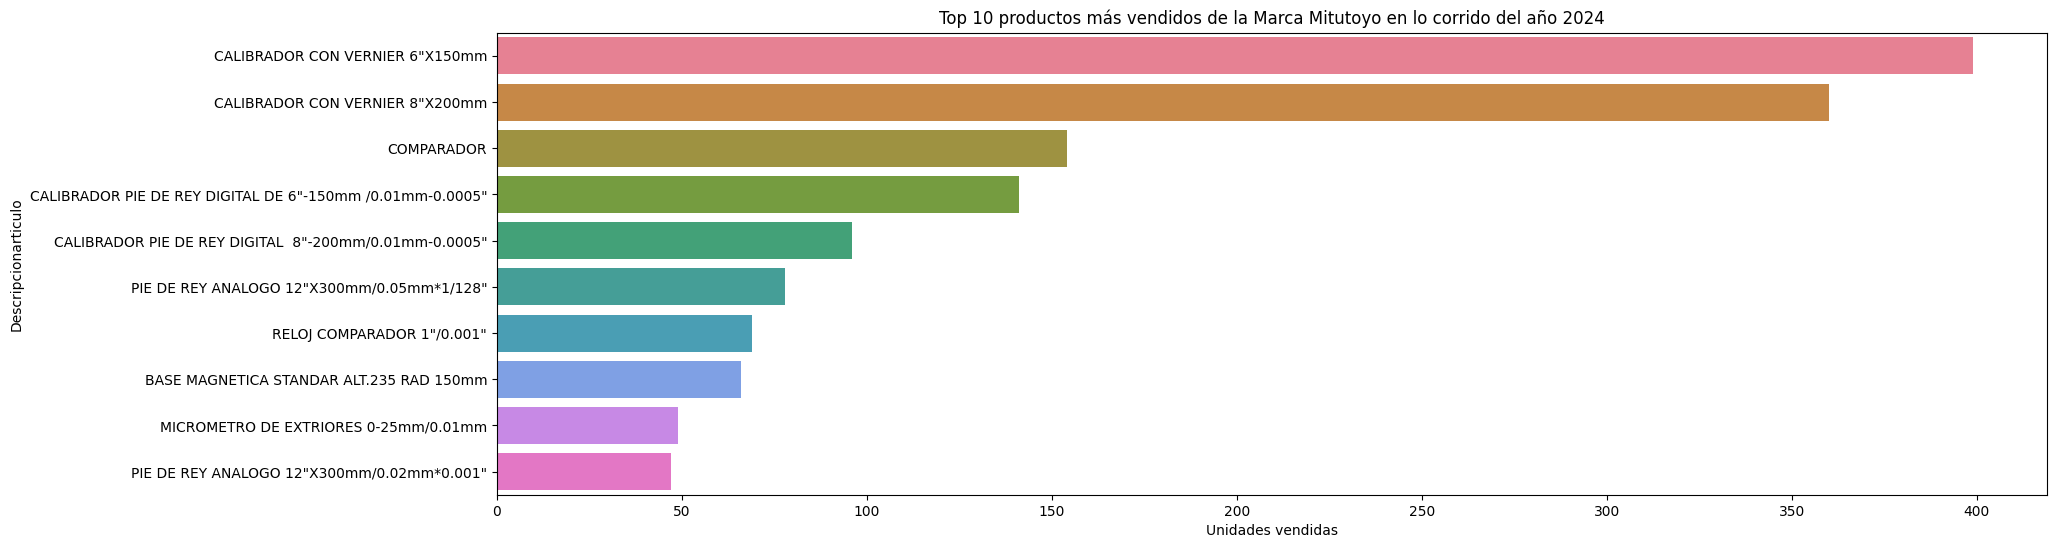

In [240]:
df_ultimo_año = df_final[df_final['Fechadocumento'].dt.year == 2024]
Mas_Vendidos=df_ultimo_año.groupby(['Descripcionarticulo'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad'],ascending=False)[:10]

plt.figure(figsize=(20,6))
sns.barplot(y = "Descripcionarticulo", x = 'Cantidad', data = Mas_Vendidos, palette= "husl")
plt.title("Top 10 productos más vendidos de la Marca Mitutoyo en lo corrido del año 2024")
plt.xlabel("Unidades vendidas")
plt.ylabel("Descripcionarticulo")
plt.show()

In [241]:
Mas_Vendidos

Descripcionarticulo  Cantidad
30                     CALIBRADOR CON VERNIER 6"X150mm       399
31                     CALIBRADOR CON VERNIER 8"X200mm       360
55                                          COMPARADOR       154
52   CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...       141
51   CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm...        96
187         PIE DE REY ANALOGO 12"X300mm/0.05mm*1/128"        78
218                         RELOJ COMPARADOR 1"/0.001"        69
13            BASE MAGNETICA STANDAR ALT.235 RAD 150mm        66
119              MICROMETRO DE EXTRIORES 0-25mm/0.01mm        49
186         PIE DE REY ANALOGO 12"X300mm/0.02mm*0.001"        47

In [242]:
df_final.dtypes

Fechadocumento         datetime64[ns]
Descripcionarticulo            object
Cantidad                        int64
dtype: object

In [243]:
#Mas_Vendidos.to_csv('Mas_Vendidos.csv', index=False)

In [244]:
top_vendidos = Mas_Vendidos['Descripcionarticulo'].iloc[:5].to_numpy()
top_vendidos

array(['CALIBRADOR CON VERNIER 6"X150mm',
       'CALIBRADOR CON VERNIER 8"X200mm', 'COMPARADOR',
       'CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.01mm-0.0005"',
       'CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm-0.0005"'],
      dtype=object)

In [245]:
nombres_productos = top_vendidos
nombres_productos

array(['CALIBRADOR CON VERNIER 6"X150mm',
       'CALIBRADOR CON VERNIER 8"X200mm', 'COMPARADOR',
       'CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.01mm-0.0005"',
       'CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm-0.0005"'],
      dtype=object)

In [246]:
df_final

Fechadocumento                                Descripcionarticulo  \
0          2024-04-30              MICROMETRO DE EXTERIORES  0-6"/0.001"   
1          2024-04-30                         GALGAS EPESORES 0.05mm-1mm   
2          2024-04-30  CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...   
3          2024-04-30  CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm...   
4          2024-04-30    TRANSPORTADOR UNIVERSAL DE ANGULOS  150mm/300mm   
...               ...                                                ...   
211542     2004-01-06         COMPARADOR DE DIAMETROS INTERIORES 18-35mm   
211571     2003-12-15                              RELOJ COMPARADOR  2mm   
211620     2001-09-02               MICROMETRO DE EXTRIORES 3"-4"/0.001"   
211623     2001-04-25                 MEDIDOR DE ESPESORES 0.05"/0.0001"   
211633     1900-01-01                            JUEGO DE BLOQUES PATRON   

        Cantidad  
0              2  
1              2  
2              2  
3              1  
4              2  
...          ...  
211542         1  
211571         1  
211620         1  
211623         2  
211633         1  

[73610 rows x 3 columns]

In [247]:
def process_sales_data(df, article_description, start_date, resample_kind):


    df_grouped = df.copy()
    
    # Filtrar por descripción del artículo
    df_grouped = df_grouped[df_grouped['Descripcionarticulo'] == article_description]
    
    # Filtrar por fecha de inicio
    df_grouped = df_grouped[df_grouped['Fechadocumento'] >= start_date]
    
    # Seleccionar las columnas de interés y establecer el índice
    df_grouped = df_grouped[['Fechadocumento', 'Cantidad']]
    df_grouped.set_index('Fechadocumento', inplace=True)
    
    # Ordenar por índice
    df_grouped = df_grouped.sort_index(ascending=True)
    
    # Remuestrear y sumar los datos
    df_grouped = df_grouped.resample(resample_kind).sum()
    
    # Ordenar por índice nuevamente (opcional, ya está ordenado)
    df_grouped = df_grouped.sort_index(ascending=True)
    
    # Renombrar la columna
    df_grouped = df_grouped.rename(columns={'Cantidad': article_description})
    
    # Imprimir rango de fechas
    print("Desde:", df_grouped.index[0])
    print("Hasta:", df_grouped.index[-1])
    
    # Imprimir el conteo de registros
    print(df_grouped.count())
    
    return df_grouped

In [248]:
start_date = '2021-06-01'
resample_kind = 'MS'  
df_grouped = process_sales_data(df_final, top_vendidos[0], start_date, resample_kind)

Desde: 2021-09-01 00:00:00
Hasta: 2024-04-01 00:00:00
CALIBRADOR CON VERNIER 6"X150mm    32
dtype: int64


In [249]:
start_date = '2021-09-01'
resample_kind = 'MS'  
df_grouped2 = process_sales_data(df_final, top_vendidos[1], start_date, resample_kind)

Desde: 2021-09-01 00:00:00
Hasta: 2024-04-01 00:00:00
CALIBRADOR CON VERNIER 8"X200mm    32
dtype: int64


In [250]:
start_date = '2021-12-01'
resample_kind = 'MS'  
df_grouped3 = process_sales_data(df_final, top_vendidos[2], start_date, resample_kind)

Desde: 2021-12-01 00:00:00
Hasta: 2024-04-01 00:00:00
COMPARADOR    29
dtype: int64


In [251]:
start_date = '2004-01-01'
resample_kind = 'MS'  
df_grouped4 = process_sales_data(df_final, top_vendidos[3], start_date, resample_kind)

Desde: 2015-02-01 00:00:00
Hasta: 2024-04-01 00:00:00
CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.01mm-0.0005"    111
dtype: int64


In [252]:
start_date = '2004-01-01'
resample_kind = 'MS'  
df_grouped5 = process_sales_data(df_final, top_vendidos[4], start_date, resample_kind)

Desde: 2015-02-01 00:00:00
Hasta: 2024-04-01 00:00:00
CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm-0.0005"    111
dtype: int64


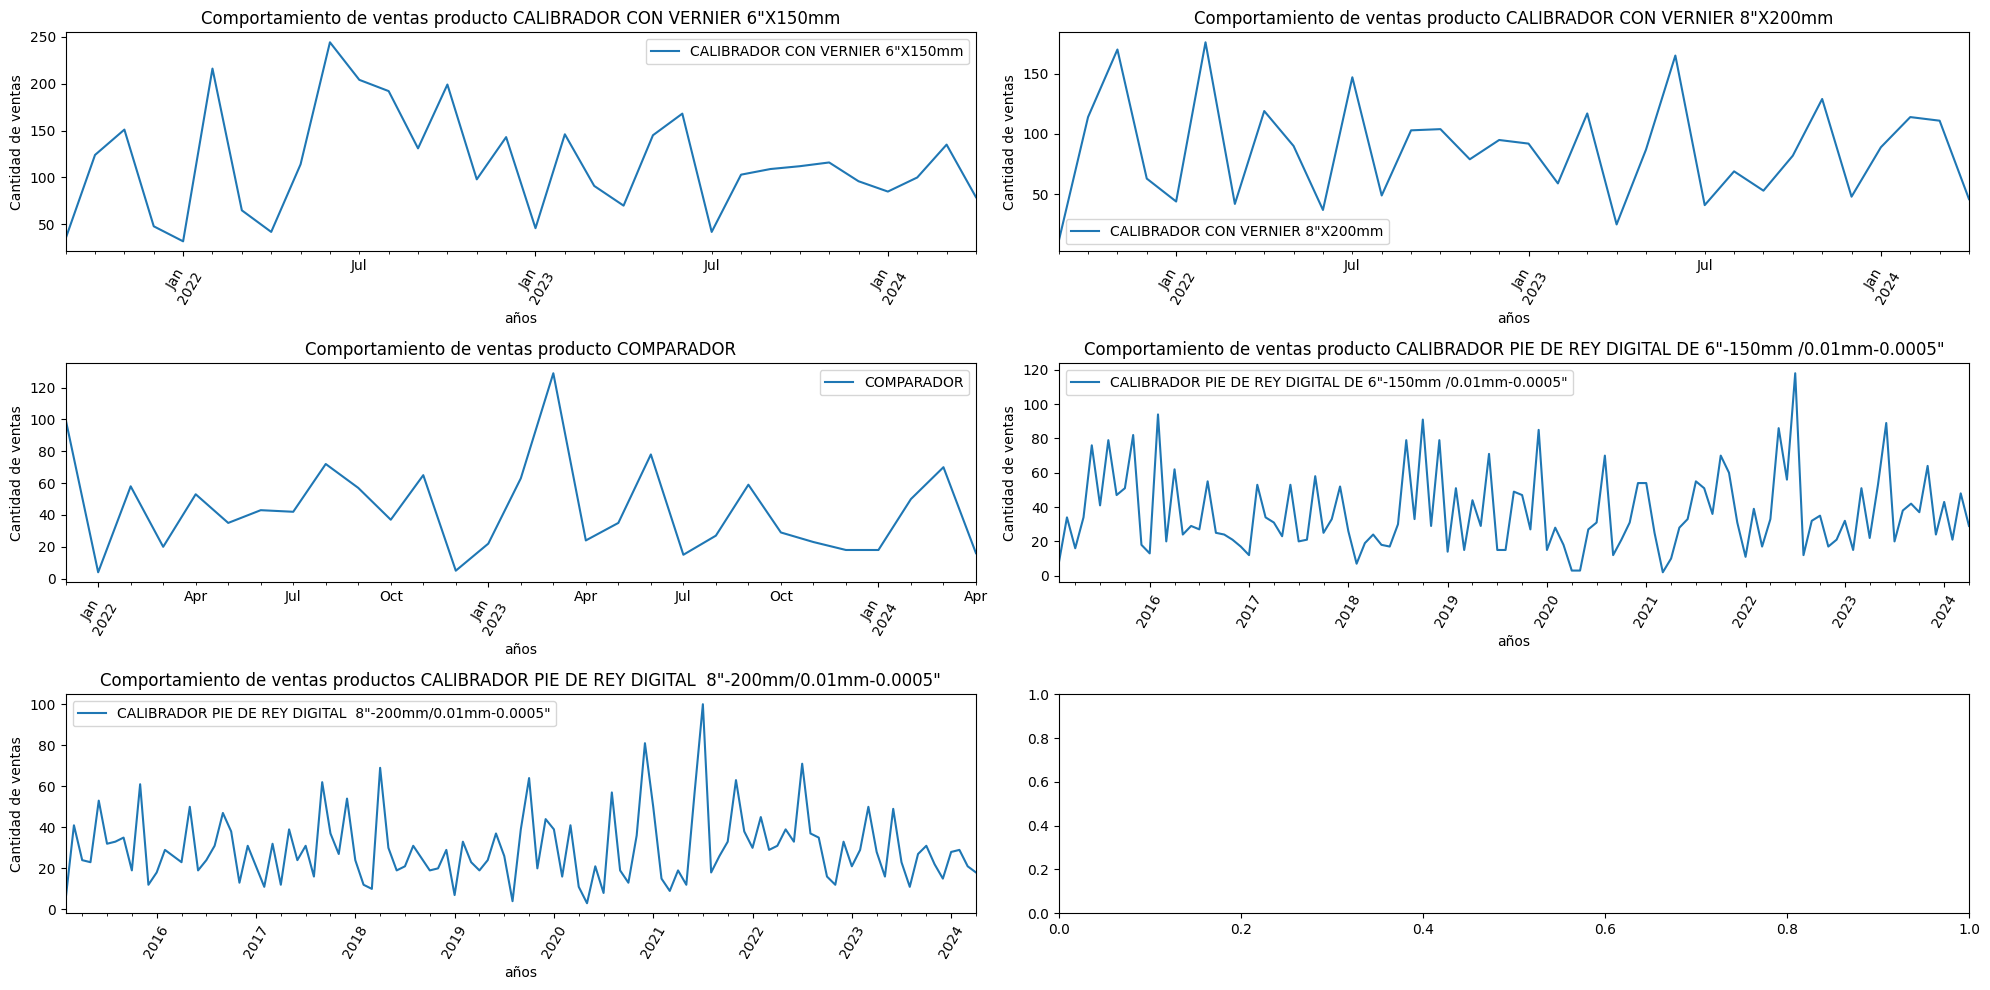

In [253]:
fig, axs = plt.subplots(figsize=[20, 10],ncols=2, nrows=3)

ax1=df_grouped.plot(kind="line",ax=axs[0,0])
ax1.set_title("Comportamiento de ventas producto "+ top_vendidos[0])
ax1.set_xlabel("años")
ax1.set_ylabel("Cantidad de ventas")
ax1.tick_params(axis='x', labelrotation=60)

ax2=df_grouped2.plot(kind="line",ax=axs[0,1])
ax2.set_title("Comportamiento de ventas producto "+ top_vendidos[1])
ax2.set_xlabel("años")
ax2.set_ylabel("Cantidad de ventas")
ax2.tick_params(axis='x', labelrotation=60)

ax3=df_grouped3.plot(kind="line",ax=axs[1,0])
ax3.set_title("Comportamiento de ventas producto "+ top_vendidos[2])
ax3.set_xlabel("años")
ax3.set_ylabel("Cantidad de ventas")
ax3.tick_params(axis='x', labelrotation=60)

ax4=df_grouped4.plot(kind="line",ax=axs[1,1])
ax4.set_title("Comportamiento de ventas producto "+ top_vendidos[3])
ax4.set_xlabel("años")
ax4.set_ylabel("Cantidad de ventas")
ax4.tick_params(axis='x', labelrotation=60)

ax5=df_grouped5.plot(kind="line",ax=axs[2,0])
ax5.set_title("Comportamiento de ventas productos "+ top_vendidos[4])
ax5.set_xlabel("años")
ax5.set_ylabel("Cantidad de ventas")
ax5.tick_params(axis='x', labelrotation=60)


fig.tight_layout()
plt.show()

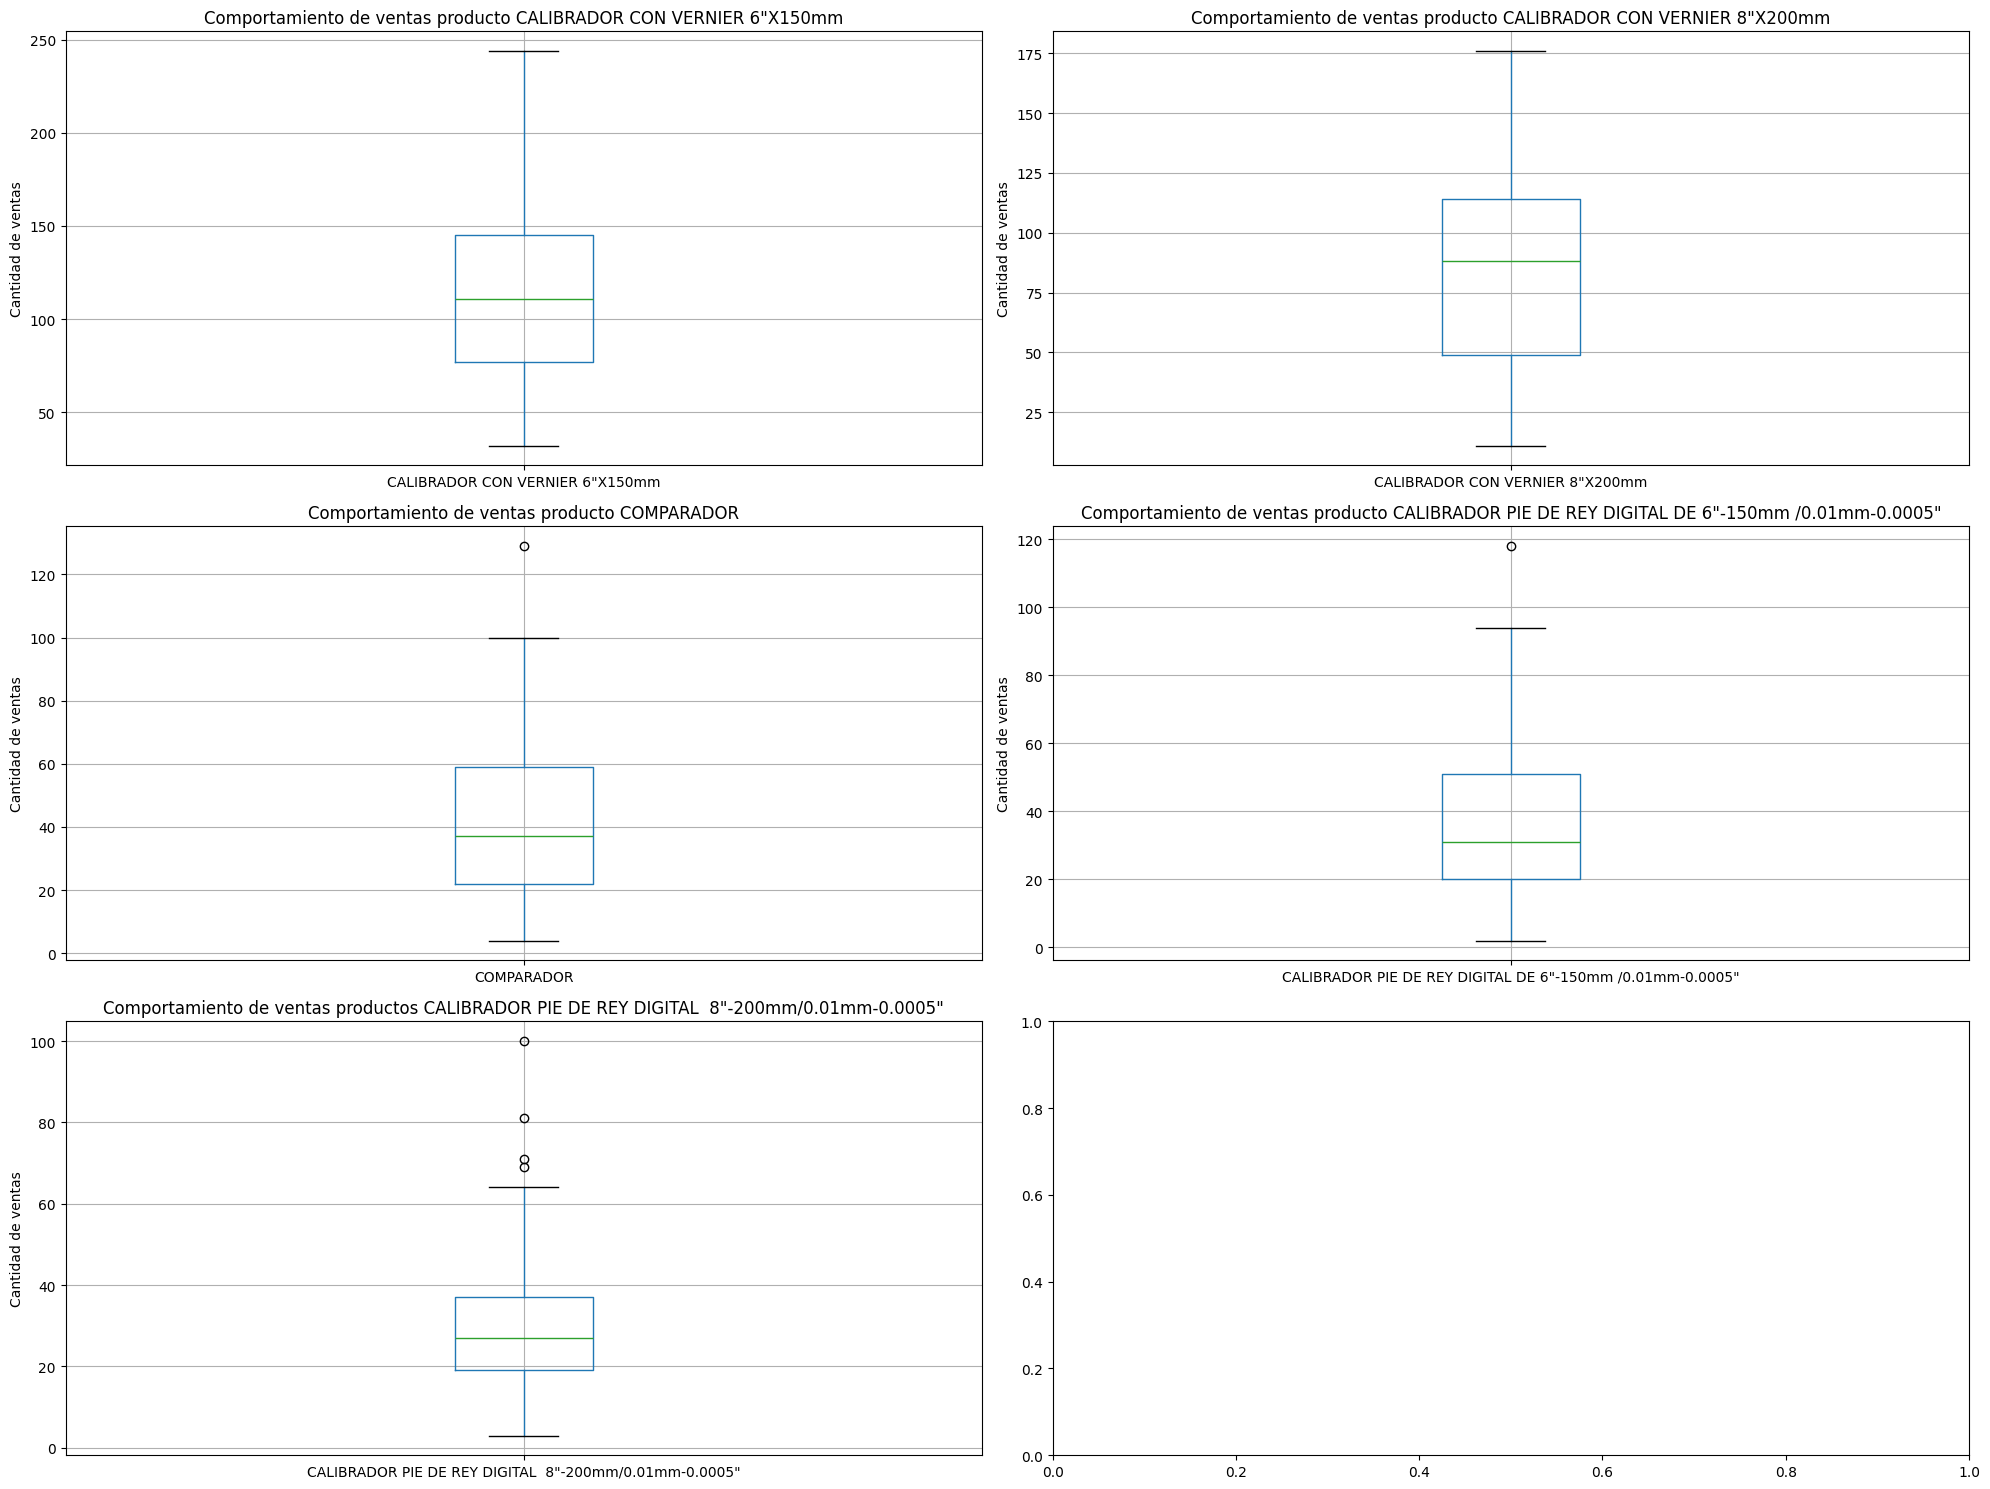

In [254]:
fig, axs = plt.subplots(figsize=[20, 15],ncols=2, nrows=3)

ax1=df_grouped.boxplot(ax=axs[0,0])
ax1.set_title("Comportamiento de ventas producto "+ top_vendidos[0])
ax1.set_ylabel("Cantidad de ventas")

ax2=df_grouped2.boxplot(ax=axs[0,1])
ax2.set_title("Comportamiento de ventas producto "+ top_vendidos[1])
ax2.set_ylabel("Cantidad de ventas")

ax3=df_grouped3.boxplot(ax=axs[1,0])
ax3.set_title("Comportamiento de ventas producto "+ top_vendidos[2])
ax3.set_ylabel("Cantidad de ventas")

ax4=df_grouped4.boxplot(ax=axs[1,1])
ax4.set_title("Comportamiento de ventas producto "+ top_vendidos[3])
ax4.set_ylabel("Cantidad de ventas")

ax5=df_grouped5.boxplot(ax=axs[2,0])
ax5.set_title("Comportamiento de ventas productos "+ top_vendidos[4])
ax5.set_ylabel("Cantidad de ventas")


fig.tight_layout()
plt.show()

In [255]:
def plot_seasonal_decompose(series, model='additive', freq=None):
    # Realizar la descomposición estacional
    res_decompose = seasonal_decompose(series, model=model, extrapolate_trend='freq', period=freq)
    
    # Crear una figura con 4 subgráficos en una columna
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 10), sharex=True)
    
    # Graficar la serie original
    res_decompose.observed.plot(ax=axs[0])
    axs[0].set_title('Serie original')
    
    # Graficar la tendencia
    res_decompose.trend.plot(ax=axs[1])
    axs[1].set_title('Tendencia')
    
    # Graficar la estacionalidad
    res_decompose.seasonal.plot(ax=axs[2])
    axs[2].set_title('Estacionalidad')
    
    # Graficar los residuos
    res_decompose.resid.plot(ax=axs[3])
    axs[3].set_title('Residuos')
    
    # Mostrar la gráfica
    plt.show()

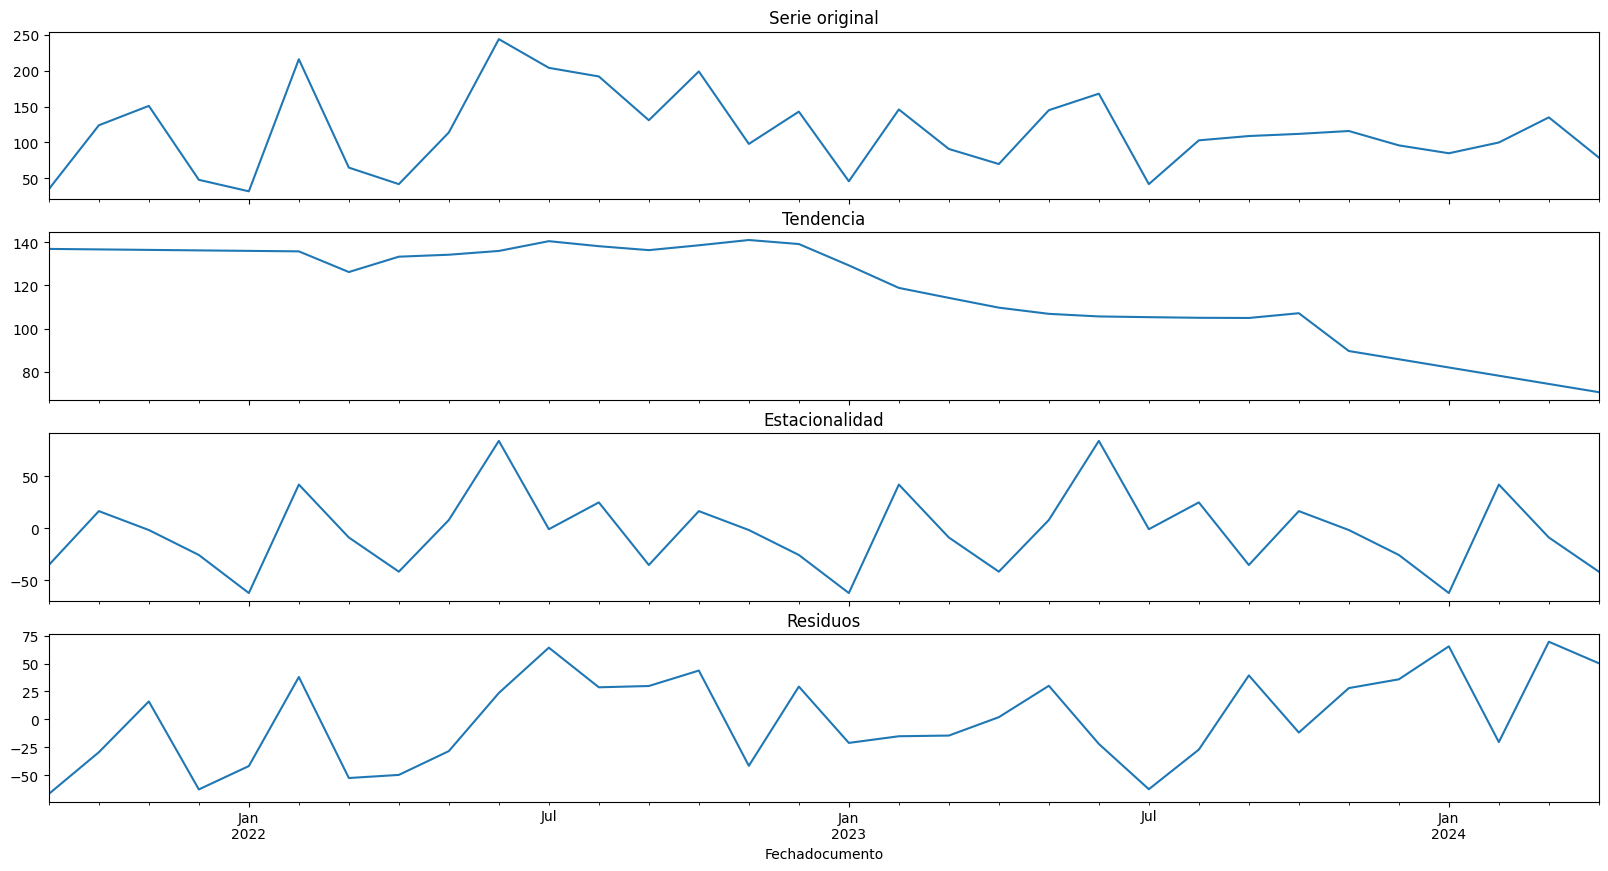

In [256]:
plot_seasonal_decompose(df_grouped[nombres_productos[0]], model='additive', freq=12)

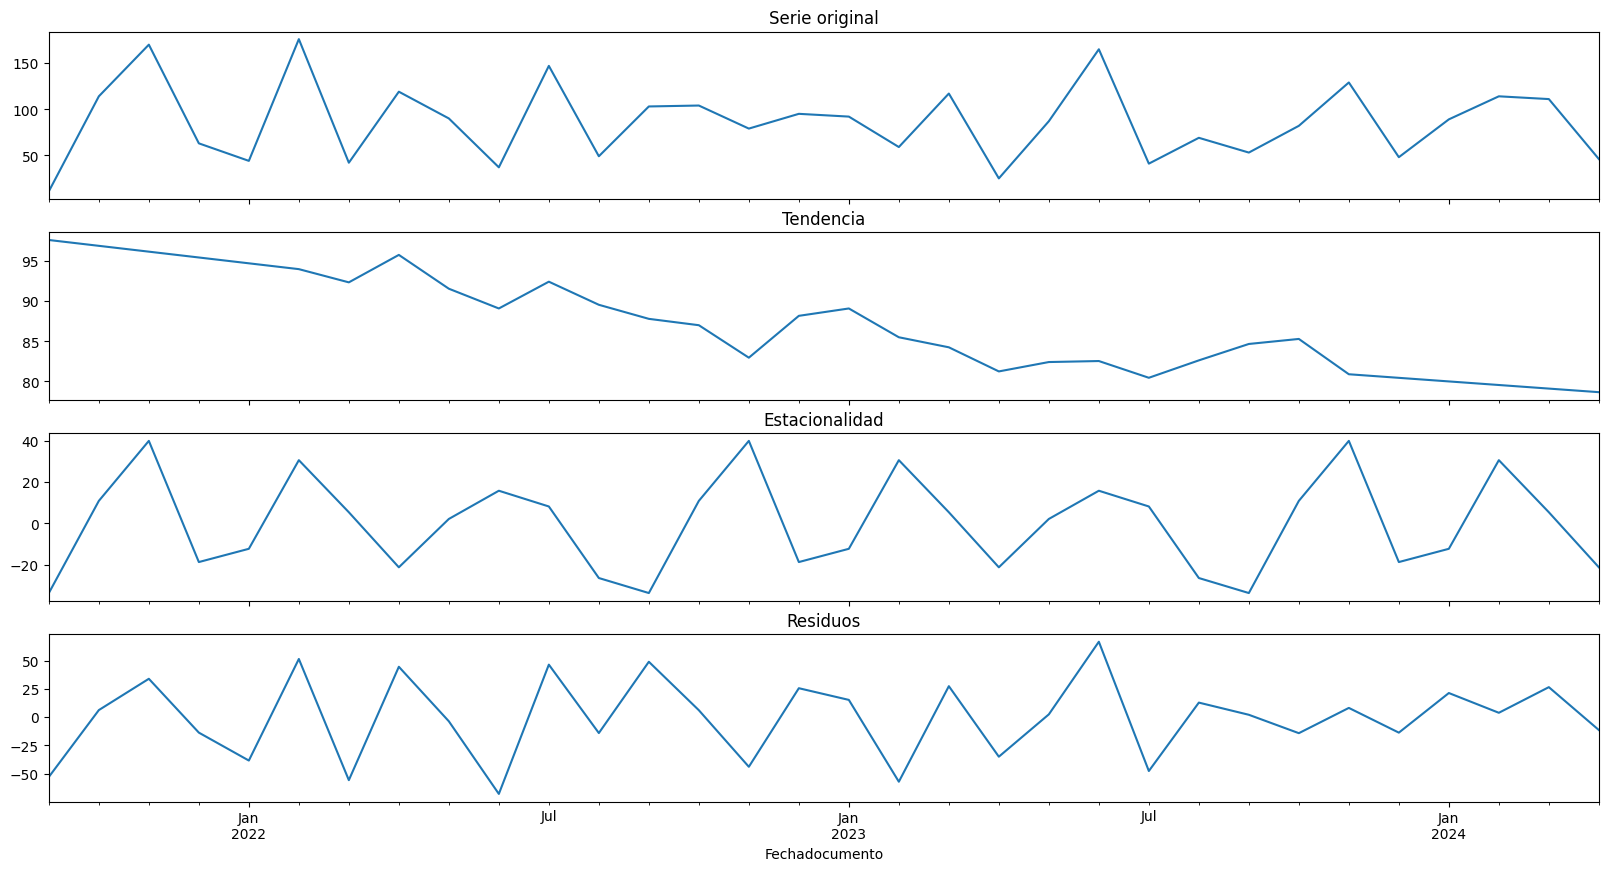

In [257]:
plot_seasonal_decompose(df_grouped2[nombres_productos[1]], model='additive', freq=12)

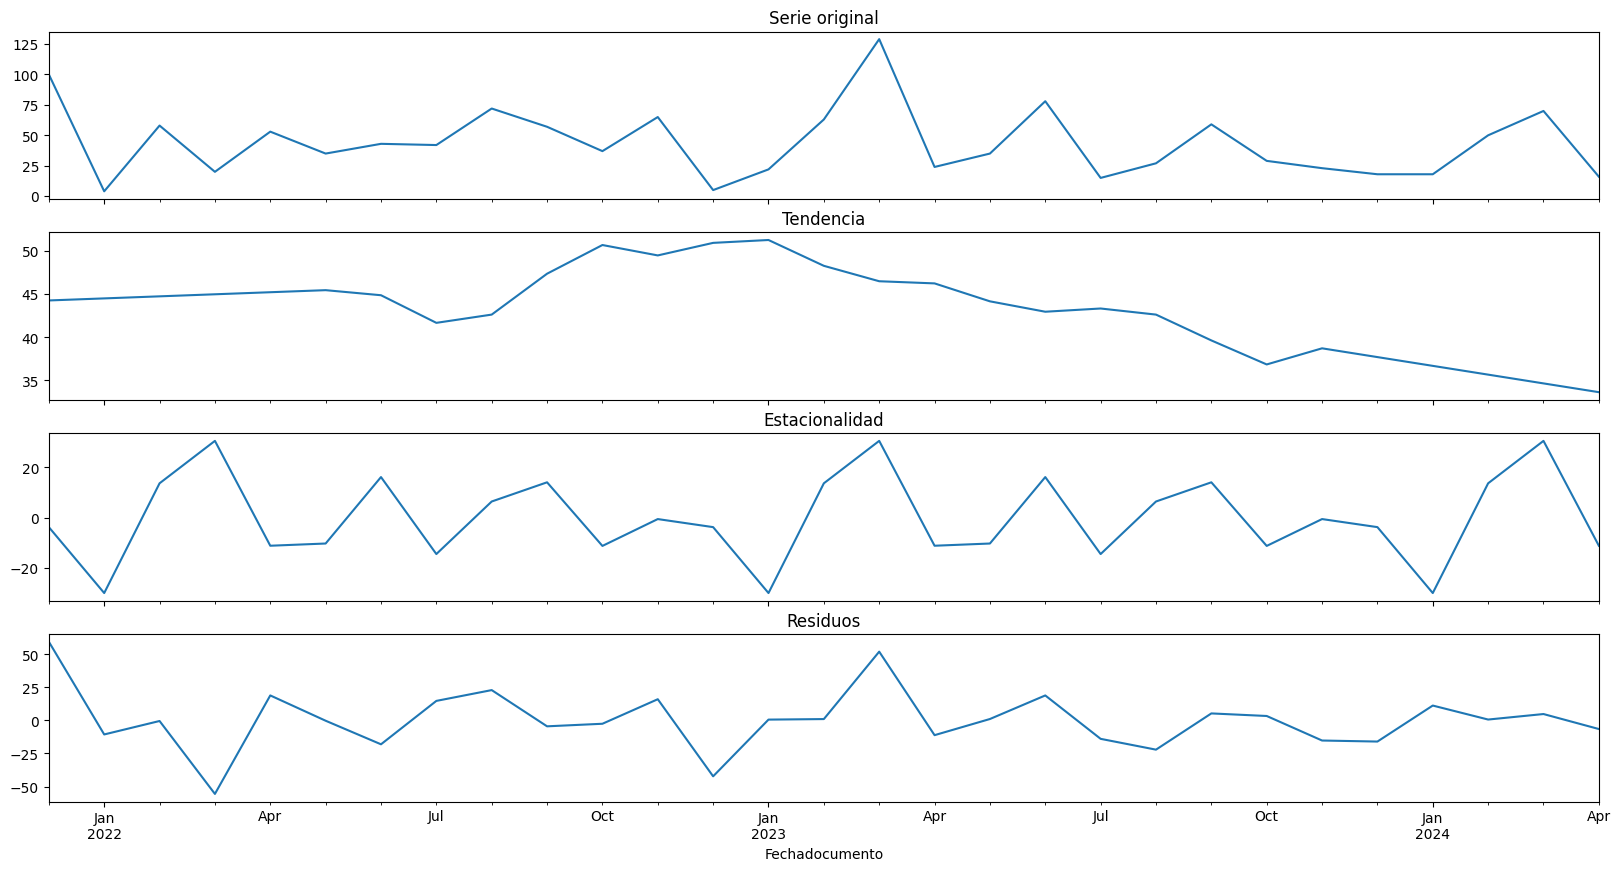

In [258]:
plot_seasonal_decompose(df_grouped3[nombres_productos[2]], model='additive', freq=12)

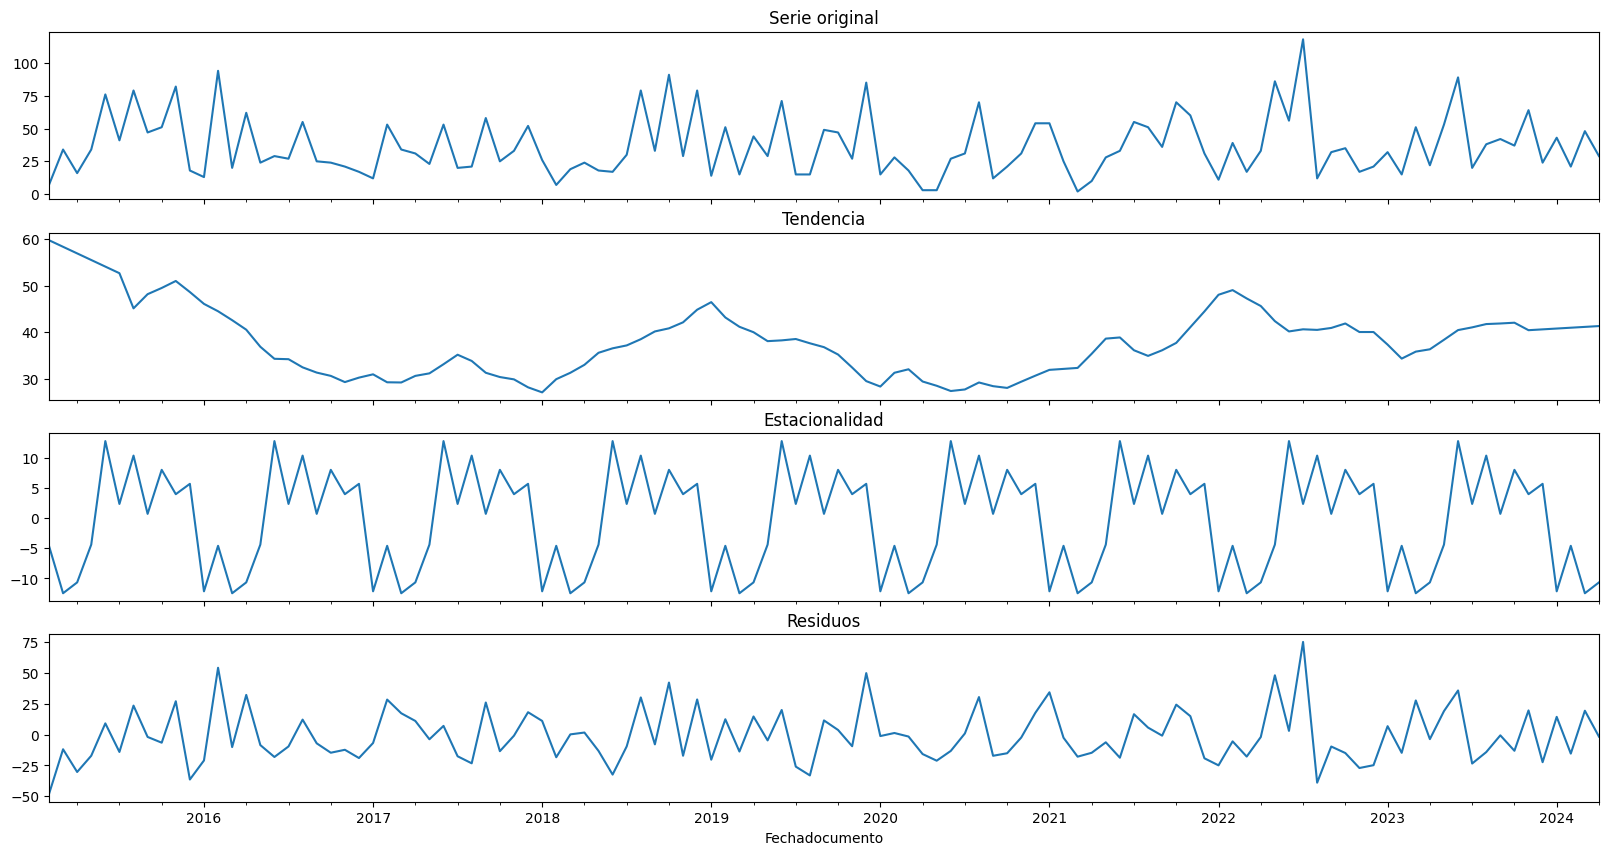

In [259]:
plot_seasonal_decompose(df_grouped4[nombres_productos[3]], model='additive', freq=12)

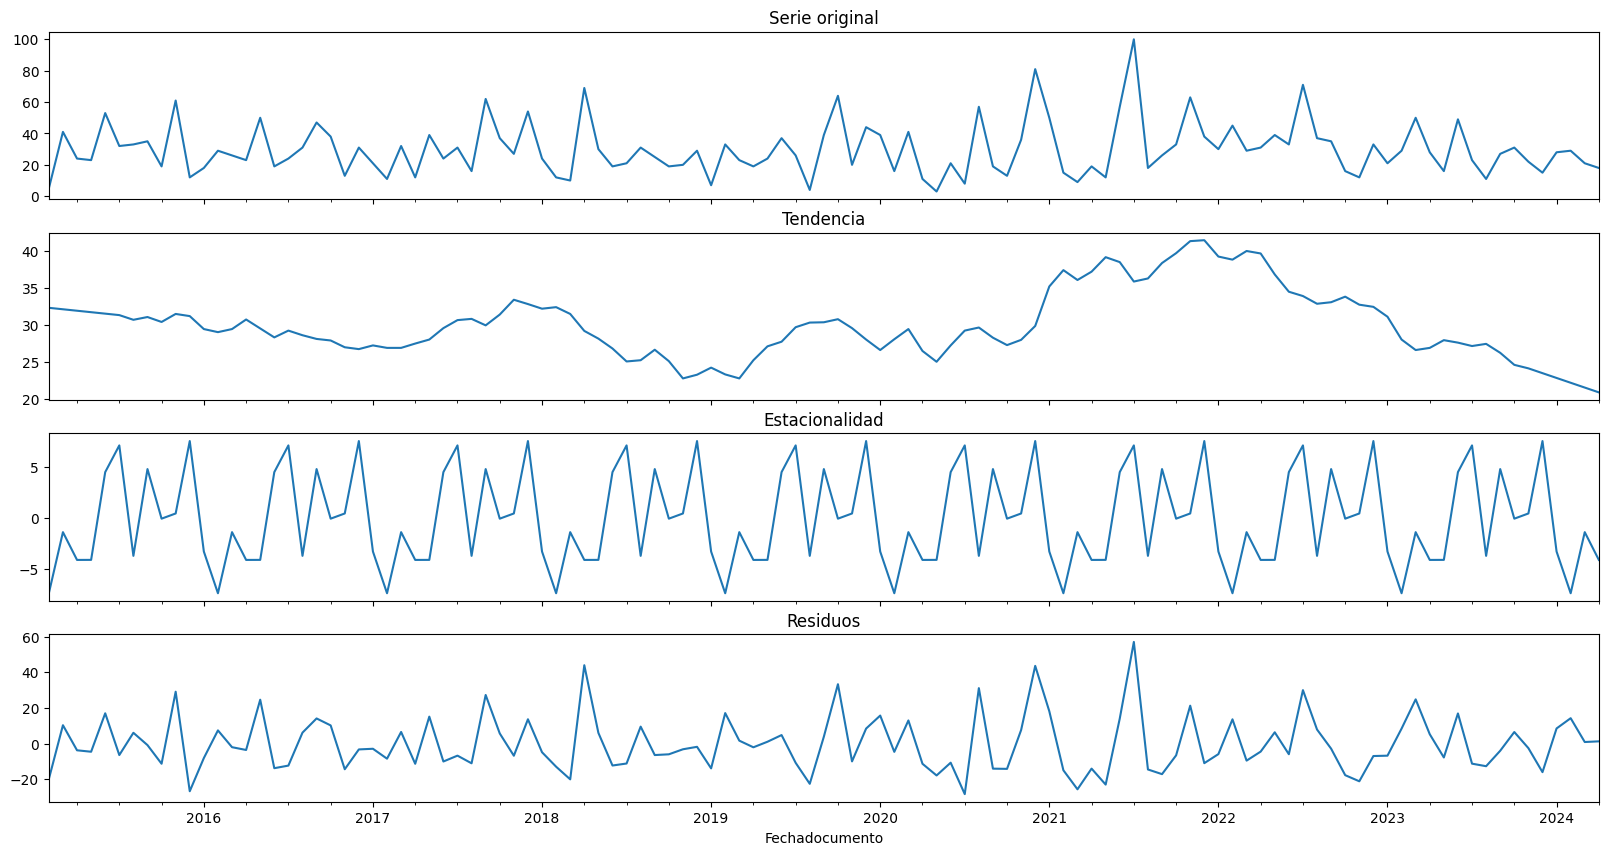

In [260]:
plot_seasonal_decompose(df_grouped5[nombres_productos[4]], model='additive', freq=12)

## PRONOSTICOS PARA PRODUCTO 1

In [261]:
Periodos_pronostico = 3
Ventana_1 = 24
Ventana_2 = 36

train_len = df_grouped.shape[0]-Periodos_pronostico
train_td = df_grouped[:train_len]
test_td = df_grouped[train_len:]


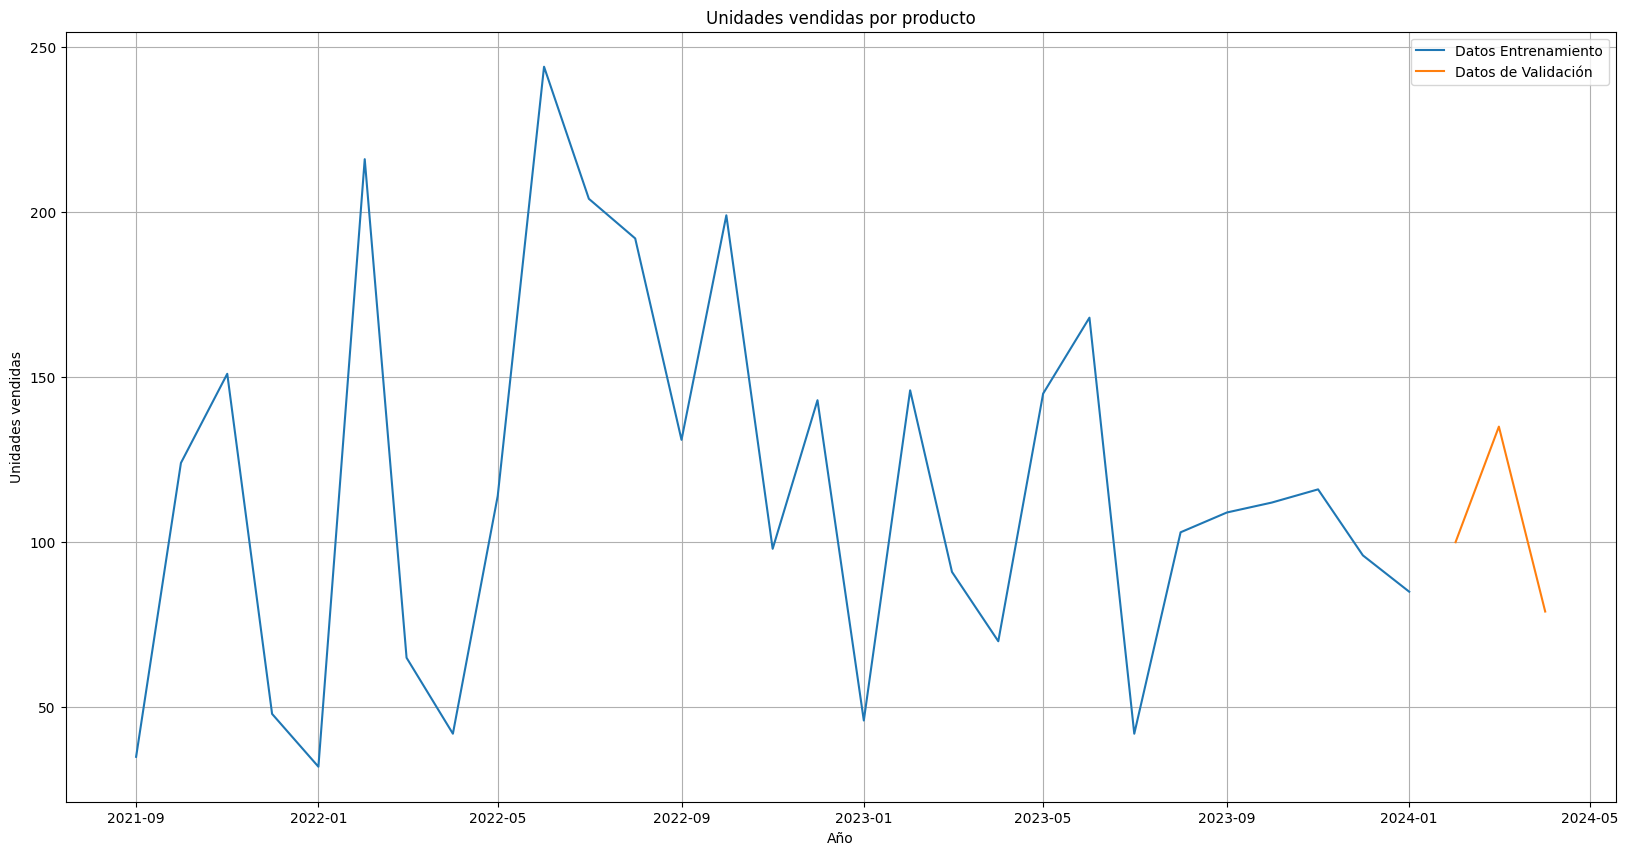

In [262]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(train_td[nombres_productos[0]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[0]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [263]:
def MA_opt(fore, w, data):

    h = 1
    errores = []

    for n in range(2,6):
        forecast_all = []

        for i in range(0, fore):
            train = data[(-w-fore+i):(-fore+i)]
            datos = train.copy()

            for x in range(1,h+1):
                ind = datos.index[-1]
                value = ind + pd.DateOffset(months=1)
                datos.loc[value]= datos[-n:].mean()

            forecast = datos[-h:]
            forecast_all.append(forecast)

        test = data[-fore:]
        errores.append([n, root_mean_squared_error(test, forecast_all)])

    return errores

In [264]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[0]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [265]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto 1 con un RMSE mínimo de 13.88 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 5


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [266]:
def Holt_Winters_opt(fore, w, data):

  def objetivo(error,trend,seasonal,alpha,beta,gamma):

      alpha = round(alpha,2)
      beta  = round(beta,2)
      gamma = round(gamma,2)
      error1 = ["add", "mul"]
      trend1 = ["add", "mul", None]
      seasonal1 = ["add", "mul", None]

      forecast_all = []
      for i in range(0,fore):
          train = data[(-w-fore+i):(-fore+i)]
          model = ETSModel(endog = train, error = error1[round(error)], trend = trend1[round(trend)], seasonal = seasonal1[round(seasonal)])
          params = {'smoothing_level': alpha,'smoothing_trend': beta,'smoothing_seasonal':gamma}

          if trend1[round(trend)] == None:
            params.pop('smoothing_trend')
          if seasonal1[round(seasonal)] == None:
            params.pop('smoothing_seasonal')

          results = model.fit_constrained(params)
          forecast = results.forecast(1)
          forecast_all.append(forecast)

      test = data[-fore:]
      return -root_mean_squared_error(test, forecast_all)

  search_space = {
     'error': (0, 1),
     'trend': (0, 2),
     'seasonal': (0, 2),
     'alpha': (0.01, 0.99),
     'beta': (0.01, 0.99),
     'gamma': (0.01, 0.99)
     }

  optimizer = BayesianOptimization(f = objetivo,
                                   pbounds = search_space,
                                   random_state=1,
                                   verbose=1)
  optimizer.maximize(init_points = 5, n_iter = 100)
  #print("\nFinal result:", optimizer.max)
  return optimizer

def best_model_hw(i, j, result):
   resumen = []
   error1 = ["add", "mul"]
   trend1 = ["add", "mul", None]
   seasonal1 = ["add", "mul", None]

   rmse_hw = round(-result.max['target'],2)
   alpha = round(result.max['params']['alpha'],2)
   beta = round(result.max['params']['beta'],2)
   gamma = round(result.max['params']['gamma'],2)
   error = error1[round(result.max['params']['error'])]
   trend = trend1[round(result.max['params']['trend'])]
   seasonal = seasonal1[round(result.max['params']['seasonal'])]

   resumen =[i, j, rmse_hw, alpha, beta, gamma, error, trend, seasonal]

   return resumen

In [267]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[0]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto 1, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 2         | -49.79    | 0.1925    | 0.3486    | 0.3968    | 0.538     | 0.8384    | 1.37      |
| 6         | -45.61    | 0.1823    | 0.3147    | 0.4895    | 0.6336    | 0.7902    | 1.374     |
| 8         | -36.62    | 0.1229    | 0.7275    | 0.2742    | 0.9105    | 0.7526    | 2.0       |
| 11        | -19.35    | 0.6901    | 0.5721    | 0.3291    | 0.7056    | 1.595     | 0.06075   |
| 14        | -17.35    | 0.8608    | 0.4742    | 0.4627    | 0.99      | 2.0       | 1.001     |
| 31        | -13.76    | 0.8138    | 0.8492    | 0.4136    | 0.8106    | 1.991     | 1.394     |

Modelo Holt-Winters para el Producto 1, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |   alpha   |   

In [268]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto 1:

w = 24, fore = 3, alfa = 0.81, beta = 0.85, gamma = 0.81, error = add, trend = mul, seasonal = None, RMSE = 13.76
w = 36, fore = 3, alfa = 0.99, beta = 0.99, gamma = 0.99, error = mul, trend = None, seasonal = None, RMSE = 13.42


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación) 

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [269]:
runstest_1samp(train_td[nombres_productos[0]], correction=False)

(-0.8073848195126351, 0.4194448101612762)

In [270]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[0]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue    bp_stat  bp_pvalue                          lb_ho  \
1    0.124771   0.723917   0.112696   0.737095  no_rechazo_ho/no_hay_autocorr   
2    0.446062   0.800090   0.392530   0.821794  no_rechazo_ho/no_hay_autocorr   
3    0.987477   0.804282   0.846620   0.838287  no_rechazo_ho/no_hay_autocorr   
4    3.998701   0.406182   3.275027   0.512899  no_rechazo_ho/no_hay_autocorr   
5    6.990008   0.221384   5.590878   0.348084  no_rechazo_ho/no_hay_autocorr   
6    7.361633   0.288694   5.866599   0.438299  no_rechazo_ho/no_hay_autocorr   
7    8.280881   0.308479   6.518969   0.480618  no_rechazo_ho/no_hay_autocorr   
8    8.704336   0.367848   6.805825   0.557720  no_rechazo_ho/no_hay_autocorr   
9   10.958478   0.278566   8.260111   0.508161  no_rechazo_ho/no_hay_autocorr   
10  11.248765   0.338468   8.438029   0.586132  no_rechazo_ho/no_hay_autocorr   
11  11.635730   0.391637   8.662718   0.652993  no_rechazo_ho/no_hay_autocorr   
12  12.325207   0.419928   9.040818   0.699440  no_rechazo_ho/no_hay_autocorr   
13  14.300194   0.353048  10.060166   0.689007  no_rechazo_ho/no_hay_autocorr   
14  15.639890   0.335857  10.708406   0.708776  no_rechazo_ho/no_hay_autocorr   
15  15.855383   0.391728  10.805726   0.766241  no_rechazo_ho/no_hay_autocorr   
16  17.192877   0.373224  11.366610   0.786311  no_rechazo_ho/no_hay_autocorr   
17  20.832357   0.233879  12.775441   0.751084  no_rechazo_ho/no_hay_autocorr   
18  20.835293   0.287804  12.776483   0.804677  no_rechazo_ho/no_hay_autocorr   
19  21.397385   0.315264  12.957803   0.840724  no_rechazo_ho/no_hay_autocorr   
20  21.436613   0.371846  12.969192   0.878702  no_rechazo_ho/no_hay_autocorr   

                            bp_ho  
1   no_rechazo_ho/no_hay_autocorr  
2   no_rechazo_ho/no_hay_autocorr  
3   no_rechazo_ho/no_hay_autocorr  
4   no_rechazo_ho/no_hay_autocorr  
5   no_rechazo_ho/no_hay_autocorr  
6   no_rechazo_ho/no_hay_autocorr  
7   no_rechazo_ho/no_hay_autocorr  
8   no_rechazo_ho/no_hay_autocorr  
9   no_rechazo_ho/no_hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11  no_rechazo_ho/no_hay_autocorr  
12  no_rechazo_ho/no_hay_autocorr  
13  no_rechazo_ho/no_hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17  no_rechazo_ho/no_hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [271]:
stats.shapiro(train_td[nombres_productos[0]])

ShapiroResult(statistic=0.9576419757595245, pvalue=0.2871985892866481)

In [272]:
stats.jarque_bera(train_td[nombres_productos[0]])

SignificanceResult(statistic=1.2518805105626039, pvalue=0.5347583826667687)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [273]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[0]]-train_td[nombres_productos[0]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.655531   0.418142   0.592093   0.441611
2    1.874971   0.391611   1.654186   0.437319
3    1.916287   0.589962   1.688838   0.639418
4    4.947087   0.292770   4.133031   0.388301
5    5.532651   0.354379   4.586371   0.468411
6    6.843718   0.335542   5.559098   0.474343
7    6.847056   0.444976   5.561467   0.591780
8    8.178455   0.416235   6.463382   0.595472
9    8.288032   0.505400   6.534077   0.685502
10   8.498316   0.580282   6.662961   0.756834
11   8.505437   0.667439   6.667096   0.825367
12   8.579827   0.738338   6.707890   0.876298
13   8.694607   0.795597   6.767132   0.913750
14  11.409057   0.653645   8.080575   0.885086
15  13.856498   0.536439   9.185871   0.867600
16  14.888005   0.532856   9.618439   0.885781
17  15.689354   0.545954   9.928638   0.906576
18  17.109639   0.515579  10.432610   0.916867
19  18.436113   0.493506  10.860505   0.928441
20  19.621200   0.481838  11.204563   0.940744

#### **6.3 Normalidad**

In [274]:
stats.shapiro(train_td[nombres_productos[0]])

ShapiroResult(statistic=0.9576419757595245, pvalue=0.2871985892866481)

In [275]:
stats.jarque_bera(train_td[nombres_productos[0]])

SignificanceResult(statistic=1.2518805105626039, pvalue=0.5347583826667687)

#### **6.4 Modelo**

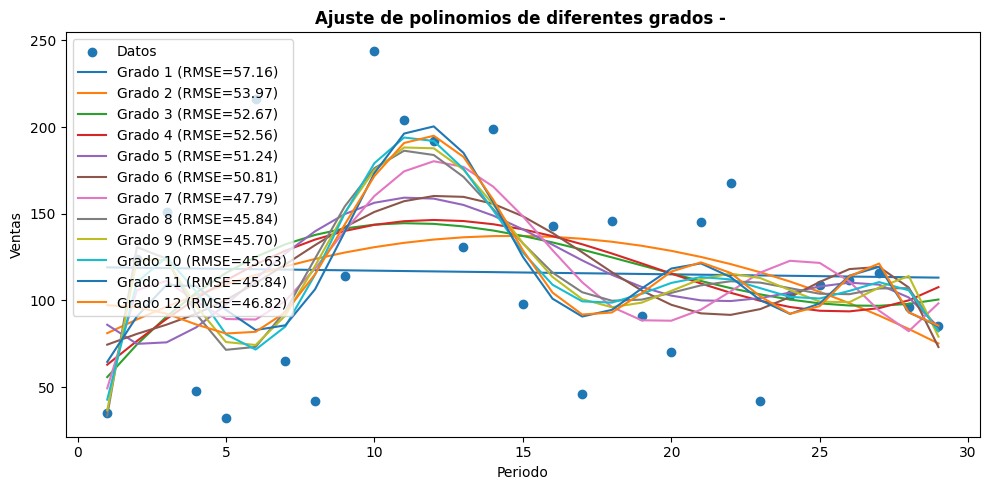

In [276]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={root_mean_squared_error(y, y_pred):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [277]:
# Funcion para evaluar modelo con polinomio de orden 10
def pol_ord_10(fore, w, data, objetivo):


    data = data
    y_obj = objetivo

    forecast_all = []

    for i in range(0,fore):
        train = data[(-w-fore+i):(-fore+i)]
        y = train[y_obj]
        x = np.linspace(1,train.shape[0],train.shape[0])
        train.loc[:,"x"] = x
        train.loc[:,"x2"] = x**2
        train.loc[:,"x3"] = x**3
        train.loc[:,"x4"] = x**4
        train.loc[:,"x5"] = x**5
        train.loc[:,"x6"] = x**6
        train.loc[:,"x7"] = x**7
        train.loc[:,"x8"] = x**8
        train.loc[:,"x9"] = x**9
        train.loc[:,"x10"] = x**10

        month_dummies = pd.get_dummies(train.index.month,drop_first=True, dtype='int').set_index(train.index)
        X = sm.add_constant( pd.concat([train[["x","x2","x3","x4","x5","x6","x7","x8","x9","x10"]],month_dummies],axis=1) )
        model = sm.OLS(y,X)
        season_pol = model.fit()

        h=1
        x_for= np.linspace((train.shape[0]+1),(train.shape[0]+h),h)
        x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5,x_for**6,x_for**7,x_for**8,x_for**9,x_for**10),axis=1), \
                                 columns=["x","x2","x3","x4","x5","x6","x7","x8","x9","x10"] )
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
        x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True, dtype='int').iloc[:h]
        X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1), has_constant='add')

        dt = season_pol.get_prediction(X_for).summary_frame(alpha = 0.05)
        y_prd = dt['mean']
        yprd_ci_lower = dt['obs_ci_lower']
        yprd_ci_upper = dt['obs_ci_upper']
        preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
        preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
        preds.set_index(range_dates,inplace=True)

        forecast_all.append(preds['Point_forecast'])

    test = data[-fore:]
    return root_mean_squared_error(test, forecast_all)

In [278]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 10 para el Producto 1:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_10(j, i, train_td, nombres_productos[0])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 10 para el Producto 1:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 1322.94
Tamaño de ventana = 36, periodos evaluados = 3, RMSE = 583.22


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [279]:
datos_diff_1_12 = train_td[nombres_productos[0]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -11.633761954814458, p-value: 2.2301861259081934e-21
KPSS Statistic: 0.3066981572751497, p-value: 0.1


In [280]:
from pmdarima.arima import ARIMA
def ARIMA_opt(fore, w, data):

    def objetivo(P, D, Q):

        forecast_all = []
        for i in range(0,fore):
            
            train = data[(-w-fore+i):(-fore+i)]
            model = ARIMA(order=(round(P), round(D), round(Q)))
            model.fit(train)
            forecast = model.predict(1).iloc[0]
            forecast_all.append(forecast)


        test = data[-fore:]
        return -mean_squared_error(test, forecast_all, squared=False)

    search_space = {
        'P': (0, 3),
        'D': (0, 3),
        'Q': (0, 3)}

    optimizer = BayesianOptimization(f = objetivo,
                                    pbounds = search_space,
                                    random_state = 1,
                                    verbose=1)

    optimizer.maximize(init_points = 5, n_iter = 100)
    #print("\nFinal result:", optimizer.max)
    return optimizer

def best_model_ARIMA(i, j, result):
   resumen = []

   rmse_arima = round(-result.max['target'],2)
   P = round(result.max['params']['P'])
   D = round(result.max['params']['D'])
   Q = round(result.max['params']['Q'])

   resumen =[i, j, rmse_arima, P, D, Q]

   return resumen

In [281]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[0]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto 1, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 2         | -15.81    | 0.907     | 0.4403    | 0.277     |
| 10        | -11.47    | 1.849     | 0.9704    | 0.0       |
| 13        | -7.974    | 1.643     | 0.632     | 0.5609    |
| 14        | -7.397    | 1.557     | 0.0       | 0.9442    |


In [282]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 0, D = 2, Q = 1, RMSE = 7.4


In [283]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_2]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[0]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto 1, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 2         | -15.39    | 0.907     | 0.4403    | 0.277     |
| 7         | -13.05    | 1.597     | 2.362     | 0.5247    |
| 24        | -11.28    | 2.254     | 1.295     | 0.738     |
| 31        | -10.22    | 2.205     | 0.2509    | 0.9404    |


In [284]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 36, fore = 3, P = 0, D = 2, Q = 1, RMSE = 10.22


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto 1, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 13.88 (w = 24, f = 3, rezagos = 5)

* Suavizacion Holt-Winters: RMSE = 13.42 (w = 36, f = 3, alfa = 0.99, beta = 0.99, gamma = 0.99, error = mul, trend = None, seasonal = None)

* Modelo polinomio orden 10: RMSE = 583.22 (w = 36, f = 3)

* ARIMA(0,2,1): RMSE = 7.4 (w = 24, f = 3)

**En este caso el mejor modelo de todos es el ARIMA(0,2,1) que tiene un RMSE de 7.4**

2024-05-01    68.419609
2024-06-01    57.089146
2024-07-01    45.008611
Freq: MS, dtype: float64


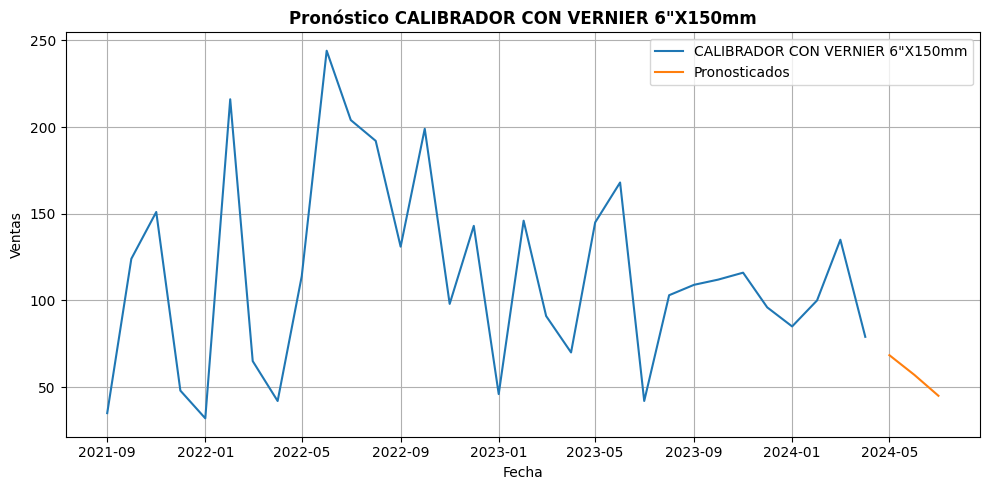

In [285]:
forecast_all = []

model = ARIMA(order=(0,2,1))
model.fit(df_grouped)
forecast = model.predict(Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index,df_grouped[nombres_productos[0]],label=nombres_productos[0])
plt.plot(forecast.index,forecast,label="Pronosticados")
plt.title('Pronóstico ' + nombres_productos[0], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()
 

## PRONOSTICOS PARA PRODUCTO 2

In [286]:
Ventana_1 = 24
Ventana_2 = 36

train_len = df_grouped2.shape[0]-Periodos_pronostico
train_td = df_grouped2[:train_len]
test_td = df_grouped2[train_len:]


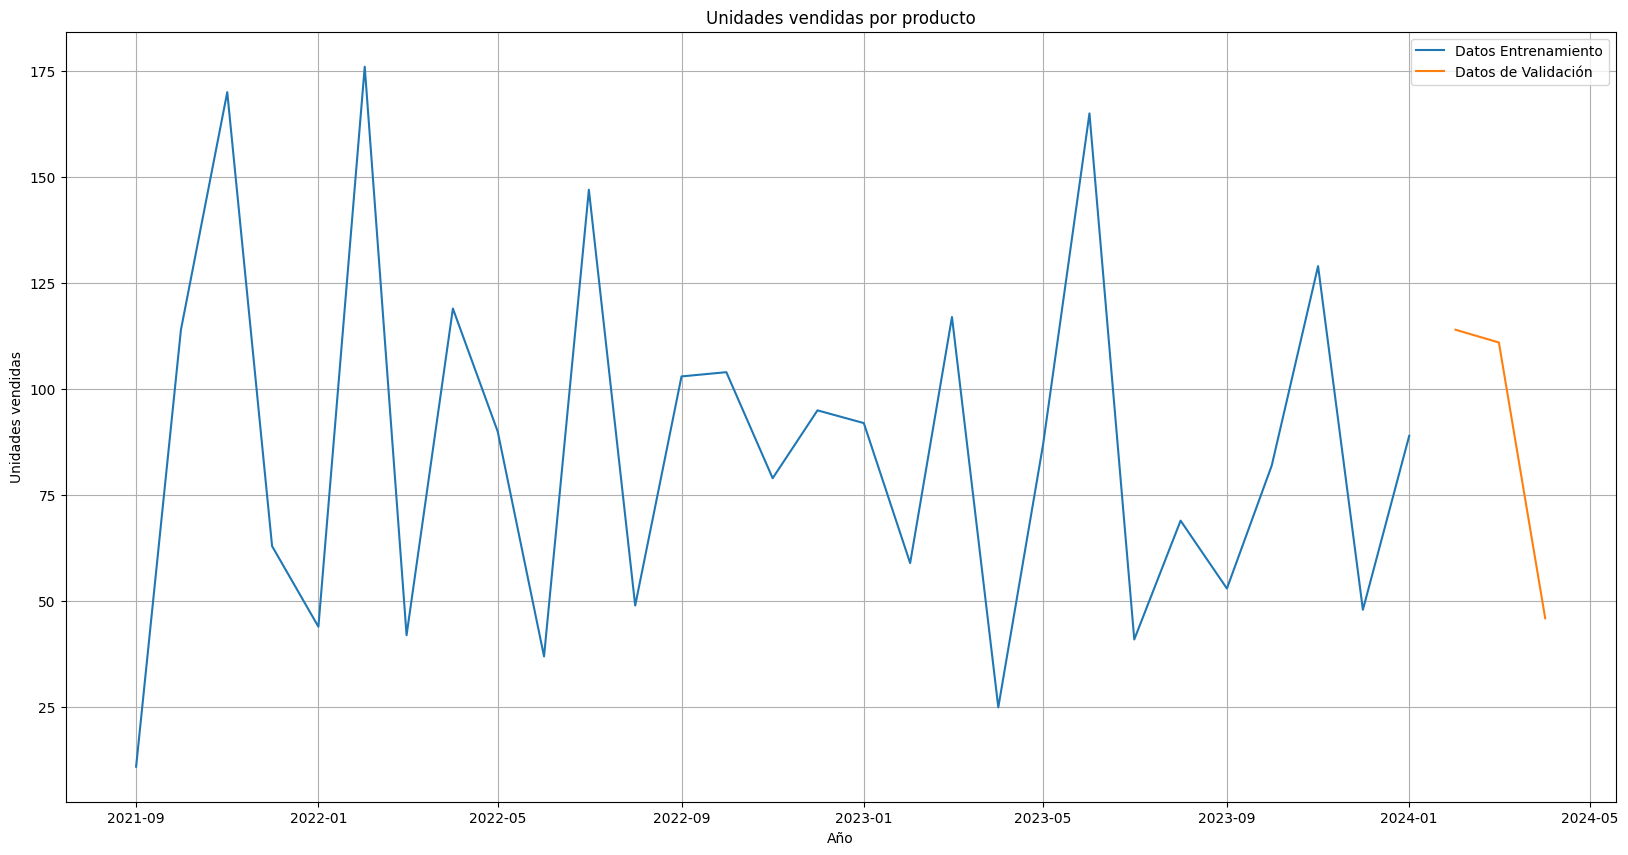

In [287]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(train_td[nombres_productos[1]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[1]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [289]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[1]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [290]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto 1 con un RMSE mínimo de 32.1 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 5


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [292]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[1]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto 1, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 2         | -55.76    | 0.1925    | 0.3486    | 0.3968    | 0.538     | 0.8384    | 1.37      |
| 6         | -54.29    | 0.1825    | 0.3154    | 0.4883    | 0.6326    | 0.7907    | 1.374     |
| 8         | -27.35    | 0.2193    | 0.01      | 0.5892    | 0.3361    | 0.8578    | 1.666     |
| 10        | -21.17    | 0.01      | 0.5785    | 0.5414    | 0.4443    | 0.0       | 1.533     |
| 78        | -19.55    | 0.01      | 0.3777    | 0.6248    | 0.01      | 1.424     | 2.0       |

Modelo Holt-Winters para el Producto 1, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
----------------------------------------

In [293]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto 1:

w = 24, fore = 3, alfa = 0.01, beta = 0.38, gamma = 0.01, error = mul, trend = None, seasonal = mul, RMSE = 19.55
w = 36, fore = 3, alfa = 0.01, beta = 0.81, gamma = 0.54, error = mul, trend = None, seasonal = mul, RMSE = 22.71


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación) 

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [294]:
runstest_1samp(train_td[nombres_productos[1]], correction=False)

(1.7105559637234433, 0.0871631140593403)

In [295]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[1]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue    bp_stat  bp_pvalue                    lb_ho  \
1    5.708421   0.016884   5.155993   0.023166  rechazo_ho/hay_autocorr   
2    7.184689   0.027534   6.441775   0.039920  rechazo_ho/hay_autocorr   
3   10.367205   0.015689   9.110982   0.027851  rechazo_ho/hay_autocorr   
4   12.900765   0.011771  11.154175   0.024885  rechazo_ho/hay_autocorr   
5   15.435570   0.008655  13.116605   0.022310  rechazo_ho/hay_autocorr   
6   15.559288   0.016325  13.208396   0.039843  rechazo_ho/hay_autocorr   
7   17.830445   0.012759  14.820184   0.038375  rechazo_ho/hay_autocorr   
8   21.885937   0.005132  17.567453   0.024714  rechazo_ho/hay_autocorr   
9   22.714551   0.006870  18.102043   0.034008  rechazo_ho/hay_autocorr   
10  22.966692   0.010870  18.256581   0.050787  rechazo_ho/hay_autocorr   
11  25.783001   0.006990  19.891857   0.046846  rechazo_ho/hay_autocorr   
12  29.863953   0.002927  22.129799   0.036091  rechazo_ho/hay_autocorr   
13  31.600633   0.002752  23.026150   0.041364  rechazo_ho/hay_autocorr   
14  31.858525   0.004196  23.150936   0.057858  rechazo_ho/hay_autocorr   
15  32.857047   0.004912  23.601882   0.072170  rechazo_ho/hay_autocorr   
16  38.603987   0.001240  26.011889   0.053861  rechazo_ho/hay_autocorr   
17  44.104556   0.000331  28.141141   0.043316  rechazo_ho/hay_autocorr   
18  44.204584   0.000539  28.176635   0.059418  rechazo_ho/hay_autocorr   
19  48.227089   0.000238  29.474217   0.058883  rechazo_ho/hay_autocorr   
20  48.622177   0.000348  29.588920   0.076794  rechazo_ho/hay_autocorr   

                            bp_ho  
1         rechazo_ho/hay_autocorr  
2         rechazo_ho/hay_autocorr  
3         rechazo_ho/hay_autocorr  
4         rechazo_ho/hay_autocorr  
5         rechazo_ho/hay_autocorr  
6         rechazo_ho/hay_autocorr  
7         rechazo_ho/hay_autocorr  
8         rechazo_ho/hay_autocorr  
9         rechazo_ho/hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11        rechazo_ho/hay_autocorr  
12        rechazo_ho/hay_autocorr  
13        rechazo_ho/hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17        rechazo_ho/hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [296]:
stats.shapiro(train_td[nombres_productos[1]])

ShapiroResult(statistic=0.9626255144992234, pvalue=0.3808240236805758)

In [297]:
stats.jarque_bera(train_td[nombres_productos[1]])

SignificanceResult(statistic=1.2754553743399113, pvalue=0.5284919597274091)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [298]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[1]]-train_td[nombres_productos[1]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue   bp_stat  bp_pvalue
1    0.151089   0.697497  0.136467   0.711819
2    0.666668   0.716531  0.585520   0.746201
3    1.309632   0.726847  1.124780   0.771096
4    1.425411   0.839767  1.218151   0.875101
5    3.645605   0.601479  2.937010   0.709696
6    4.482789   0.611636  3.558147   0.736218
7    5.180707   0.637921  4.053444   0.773602
8    5.182080   0.737950  4.054374   0.852185
9    5.288511   0.808468  4.123039   0.903129
10   5.305977   0.869824  4.133744   0.941112
11   5.330228   0.914125  4.147825   0.965391
12   5.386063   0.943827  4.178444   0.979997
13   6.288640   0.935014  4.644290   0.982212
14   6.305853   0.958184  4.652619   0.990084
15   7.343479   0.947408  5.121224   0.991049
16   8.564993   0.930242  5.633472   0.991593
17   9.258581   0.931798  5.901958   0.993821
18  13.509873   0.760438  7.410481   0.986184
19  16.588623   0.617716  8.403626   0.982128
20  17.887072   0.594847  8.780595   0.985312

#### **6.3 Normalidad**

In [300]:
stats.shapiro(train_td[nombres_productos[1]])

ShapiroResult(statistic=0.9626255144992234, pvalue=0.3808240236805758)

In [301]:
stats.jarque_bera(train_td[nombres_productos[1]])

SignificanceResult(statistic=1.2754553743399113, pvalue=0.5284919597274091)

#### **6.4 Modelo**

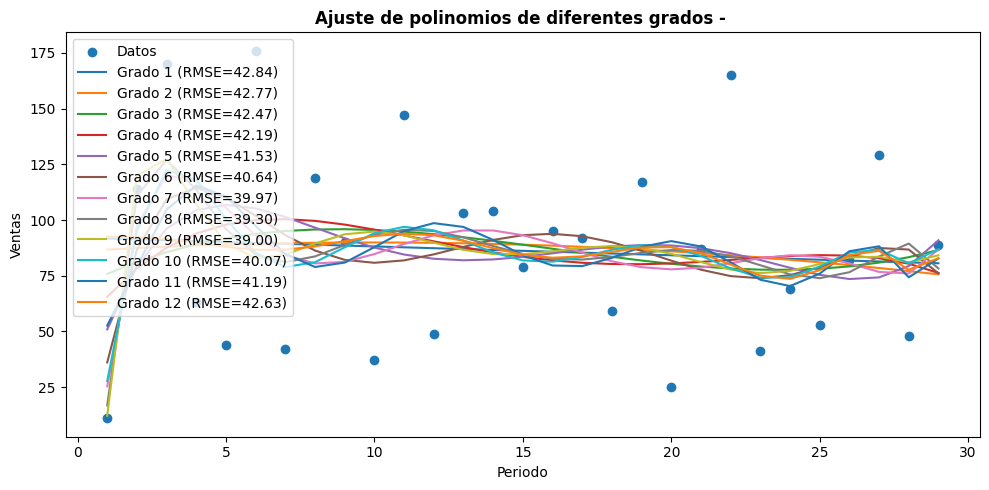

In [302]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={root_mean_squared_error(y, y_pred):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [409]:
# Funcion para evaluar modelo con polinomio de orden 10
def pol_ord_9(fore, w, data, objetivo):


    data = data
    y_obj = objetivo

    forecast_all = []

    for i in range(0,fore):
        train = data[(-w-fore+i):(-fore+i)]
        y = train[y_obj]
        x = np.linspace(1,train.shape[0],train.shape[0])
        train.loc[:,"x"] = x
        train.loc[:,"x2"] = x**2
        train.loc[:,"x3"] = x**3
        train.loc[:,"x4"] = x**4
        train.loc[:,"x5"] = x**5
        train.loc[:,"x6"] = x**6
        train.loc[:,"x7"] = x**7
        train.loc[:,"x8"] = x**8
        train.loc[:,"x9"] = x**9

        month_dummies = pd.get_dummies(train.index.month,drop_first=True, dtype='int').set_index(train.index)
        X = sm.add_constant( pd.concat([train[["x","x2","x3","x4","x5","x6","x7","x8","x9"]],month_dummies],axis=1) )
        model = sm.OLS(y,X)
        season_pol = model.fit()

        h=1
        x_for= np.linspace((train.shape[0]+1),(train.shape[0]+h),h)
        x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5,x_for**6,x_for**7,x_for**8,x_for**9),axis=1), \
                                 columns=["x","x2","x3","x4","x5","x6","x7","x8","x9"] )
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
        x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True, dtype='int').iloc[:h]
        X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1), has_constant='add')

        dt = season_pol.get_prediction(X_for).summary_frame(alpha = 0.05)
        y_prd = dt['mean']
        yprd_ci_lower = dt['obs_ci_lower']
        yprd_ci_upper = dt['obs_ci_upper']
        preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
        preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
        preds.set_index(range_dates,inplace=True)

        forecast_all.append(preds['Point_forecast'])

    test = data[-fore:]
    return root_mean_squared_error(test, forecast_all)

In [304]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_10(j, i, train_td, nombres_productos[1])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 10 para el Producto 1:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 496.6
Tamaño de ventana = 36, periodos evaluados = 3, RMSE = 328.99


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [305]:
datos_diff_1_12 = train_td[nombres_productos[1]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -3.1797248547086157, p-value: 0.02118869122148465
KPSS Statistic: 0.3036318733870599, p-value: 0.1


In [307]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[1]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto 1, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 3         | -35.68    | 0.5588    | 1.037     | 1.19      |
| 4         | -35.04    | 1.616     | 1.258     | 2.056     |
| 6         | -24.57    | 1.128     | 2.37      | 2.323     |
| 8         | -21.88    | 0.01668   | 2.998     | 3.0       |
| 11        | -16.81    | 0.0       | 3.0       | 1.92      |
| 14        | -6.802    | 0.9984    | 0.0       | 3.0       |


In [308]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 0, D = 1, Q = 3, RMSE = 6.8


In [309]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_2]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[1]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto 1, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 3         | -33.33    | 0.5588    | 1.037     | 1.19      |
| 7         | -31.27    | 0.7268    | 1.305     | 1.766     |
| 8         | -23.93    | 0.0       | 0.8414    | 1.927     |
| 9         | -17.59    | 0.0       | 0.3916    | 2.822     |
| 10        | -15.13    | 0.0       | 1.362     | 3.0       |
| 16        | -9.193    | 1.165     | 0.0       | 3.0       |


In [310]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 36, fore = 3, P = 0, D = 1, Q = 3, RMSE = 9.19


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto 1, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 32.1 (w = 24, f = 3, rezagos = 5)

* Suavizacion Holt-Winters: RMSE = 19.55 (w = 24, f = 3, alfa = 0.01, beta = 0.38, gamma = 0.01, error = mul, trend = None, seasonal = mul)

* Modelo polinomio orden 9: RMSE = 328.99 (w = 24, f = 3)

* ARIMA(0,1,3): RMSE = 6.8 (w = 24, f = 3)

**En este caso el mejor modelo de todos es el ARIMA(0,1,3) que tiene un RMSE de 6.8**

2024-05-01    60.972529
2024-06-01    77.875218
2024-07-01    77.337295
Freq: MS, dtype: float64


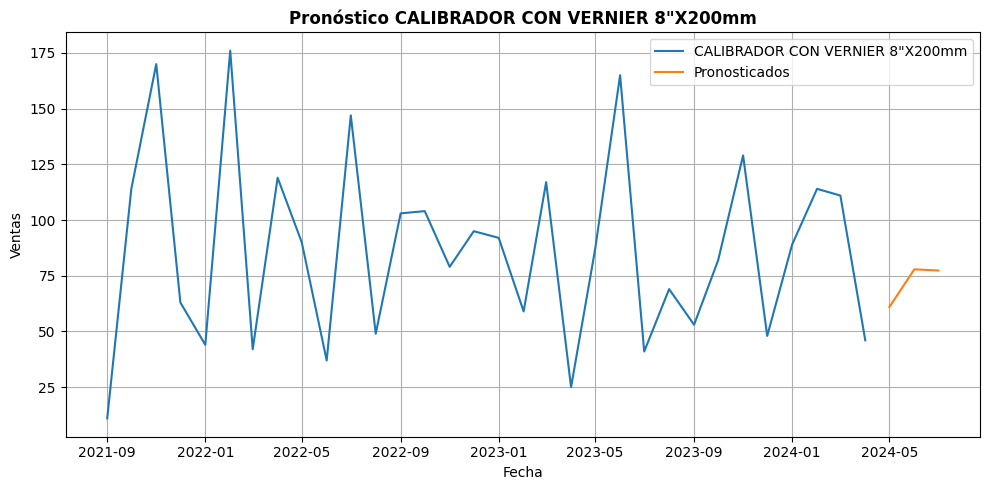

In [396]:
forecast_all = []

model = ARIMA(order=(0,1,3))
model.fit(df_grouped2)
forecast = model.predict(Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped2.index,df_grouped2[nombres_productos[1]],label=nombres_productos[1])
plt.plot(forecast.index,forecast,label="Pronosticados")
plt.title('Pronóstico ' + nombres_productos[1], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()
 

## PRONOSTICOS PARA PRODUCTO 3

In [397]:
Ventana_1 = 24
Ventana_2 = 36

train_len = df_grouped3.shape[0]-Periodos_pronostico + 1
train_td = df_grouped3[:train_len]
test_td = df_grouped3[train_len:]


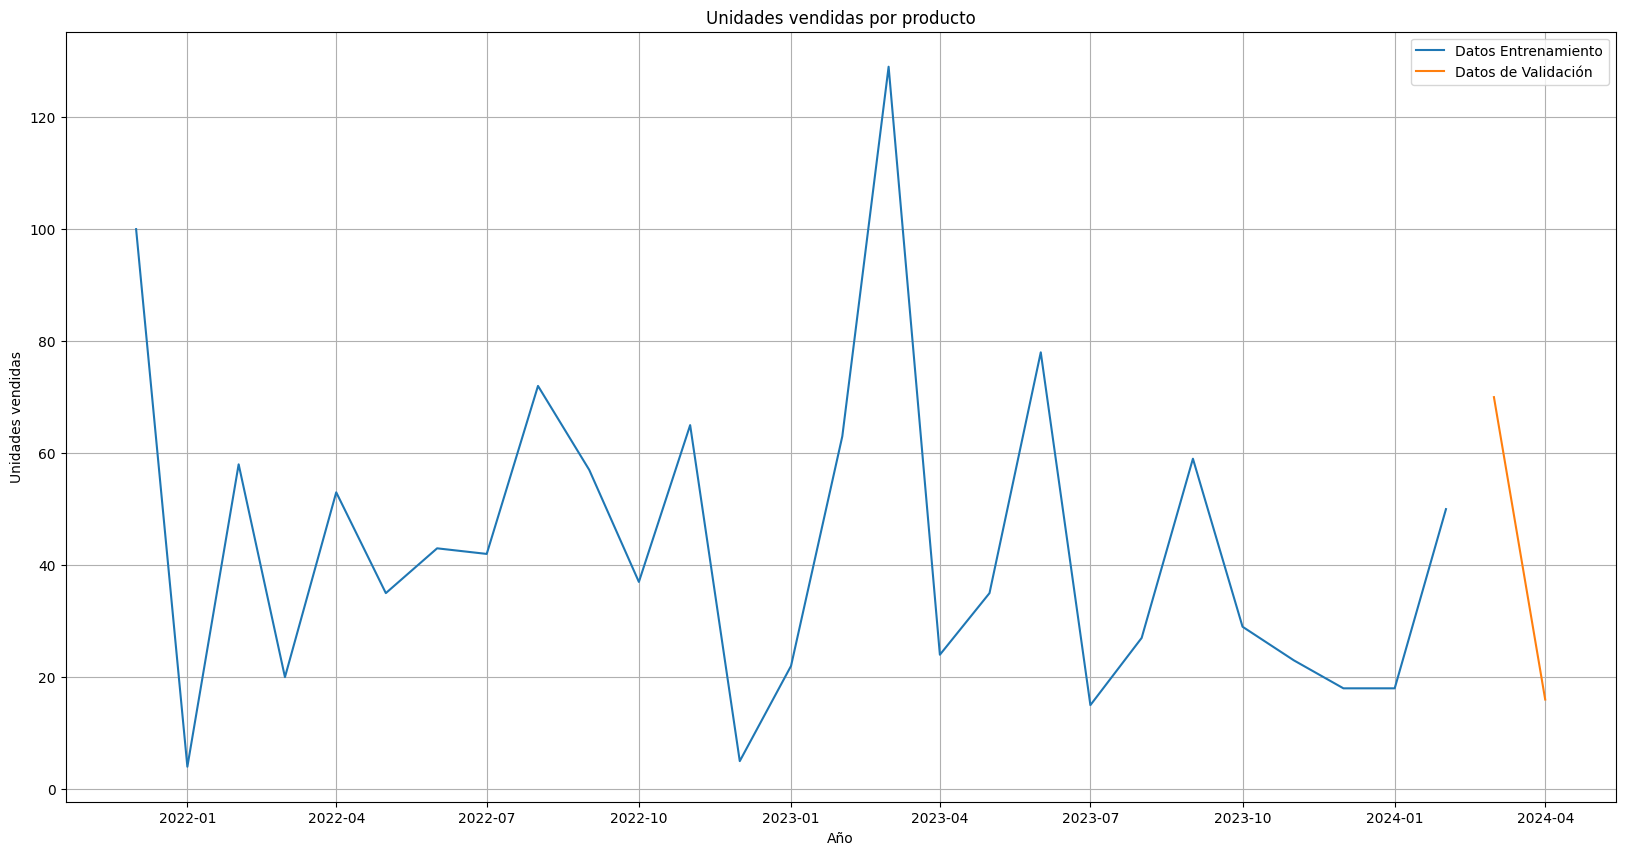

In [398]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(train_td[nombres_productos[2]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[2]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [400]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[2]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [401]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto con un RMSE mínimo de 15.89 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 5


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [404]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [24]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[2]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 5         | -21.65    | 0.8689    | 0.8867    | 0.08504   | 0.04827   | 0.3397    | 1.756     |
| 12        | -13.44    | 0.5095    | 0.6929    | 0.1649    | 0.6154    | 0.4026    | 1.66      |
| 30        | -11.36    | 0.1598    | 0.01      | 0.3012    | 0.3997    | 0.0       | 0.0       |
| 40        | -2.946    | 0.1096    | 0.6451    | 0.6578    | 0.7406    | 0.5929    | 1.88      |


In [405]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:

w = 24, fore = 3, alfa = 0.11, beta = 0.65, gamma = 0.74, error = mul, trend = None, seasonal = mul, RMSE = 2.95


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación) 

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [328]:
runstest_1samp(train_td[nombres_productos[2]], correction=False)

(1.2060453783110547, 0.2277999939882288)

In [330]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[2]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue   bp_stat  bp_pvalue                          lb_ho  \
1    0.802930   0.370219  0.719869   0.396187  no_rechazo_ho/no_hay_autocorr   
2    1.229916   0.540664  1.087960   0.580434  no_rechazo_ho/no_hay_autocorr   
3    1.236720   0.744212  1.093590   0.778622  no_rechazo_ho/no_hay_autocorr   
4    1.273061   0.865929  1.122413   0.890700  no_rechazo_ho/no_hay_autocorr   
5    2.651991   0.753451  2.168497   0.825373  no_rechazo_ho/no_hay_autocorr   
6    2.985584   0.810654  2.410065   0.878394  no_rechazo_ho/no_hay_autocorr   
7    3.574592   0.827263  2.816278   0.901462  no_rechazo_ho/no_hay_autocorr   
8    3.985757   0.858406  3.085661   0.928867  no_rechazo_ho/no_hay_autocorr   
9    4.011382   0.910662  3.101567   0.960132  no_rechazo_ho/no_hay_autocorr   
10   4.651808   0.913192  3.476989   0.967874  no_rechazo_ho/no_hay_autocorr   
11   5.478816   0.905783  3.933269   0.971829  no_rechazo_ho/no_hay_autocorr   
12   5.956851   0.918242  4.180528   0.979954  no_rechazo_ho/no_hay_autocorr   
13   5.957214   0.947696  4.180703   0.989113  no_rechazo_ho/no_hay_autocorr   
14   7.205982   0.926479  4.740496   0.989106  no_rechazo_ho/no_hay_autocorr   
15   9.321494   0.860117  5.615881   0.985503  no_rechazo_ho/no_hay_autocorr   
16   9.455734   0.893466  5.666799   0.991312  no_rechazo_ho/no_hay_autocorr   
17  10.241917   0.893160  5.937897   0.993593  no_rechazo_ho/no_hay_autocorr   
18  11.636525   0.865424  6.370706   0.994447  no_rechazo_ho/no_hay_autocorr   
19  11.660856   0.899606  6.377418   0.996865  no_rechazo_ho/no_hay_autocorr   
20  12.050579   0.914324  6.471489   0.998092  no_rechazo_ho/no_hay_autocorr   

                            bp_ho  
1   no_rechazo_ho/no_hay_autocorr  
2   no_rechazo_ho/no_hay_autocorr  
3   no_rechazo_ho/no_hay_autocorr  
4   no_rechazo_ho/no_hay_autocorr  
5   no_rechazo_ho/no_hay_autocorr  
6   no_rechazo_ho/no_hay_autocorr  
7   no_rechazo_ho/no_hay_autocorr  
8   no_rechazo_ho/no_hay_autocorr  
9   no_rechazo_ho/no_hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11  no_rechazo_ho/no_hay_autocorr  
12  no_rechazo_ho/no_hay_autocorr  
13  no_rechazo_ho/no_hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17  no_rechazo_ho/no_hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [331]:
stats.shapiro(train_td[nombres_productos[2]])

ShapiroResult(statistic=0.9227377342706102, pvalue=0.04597300199362989)

In [332]:
stats.jarque_bera(train_td[nombres_productos[2]])

SignificanceResult(statistic=6.59924856358589, pvalue=0.036897027682383454)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [333]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[2]]-train_td[nombres_productos[2]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue   bp_stat  bp_pvalue
1    0.003115   0.955488  0.002793   0.957851
2    0.385427   0.824718  0.332372   0.846889
3    1.314916   0.725594  1.101604   0.776687
4    1.326757   0.856820  1.110996   0.892524
5    2.193838   0.821725  1.768781   0.880123
6    2.921447   0.818640  2.295671   0.890598
7    3.079419   0.877559  2.404617   0.934107
8    3.810312   0.873819  2.883477   0.941456
9    4.460866   0.878552  3.287269   0.951809
10   5.029363   0.889208  3.620527   0.962847
11   6.106015   0.866198  4.214541   0.963216
12   6.163159   0.907635  4.244099   0.978618
13   6.374002   0.931476  4.345885   0.986925
14   6.844063   0.940556  4.556602   0.991078
15  13.082940   0.595892  7.138206   0.953700
16  13.088170   0.666300  7.140190   0.970463
17  13.092743   0.729956  7.141767   0.981638
18  13.240417   0.777097  7.187597   0.988447
19  13.289428   0.823430  7.201117   0.993061
20  13.295703   0.864339  7.202632   0.995966

#### **6.3 Normalidad**

In [334]:
stats.shapiro(train_td[nombres_productos[2]])

ShapiroResult(statistic=0.9227377342706102, pvalue=0.04597300199362989)

In [335]:
stats.jarque_bera(train_td[nombres_productos[2]])

SignificanceResult(statistic=6.59924856358589, pvalue=0.036897027682383454)

#### **6.4 Modelo**

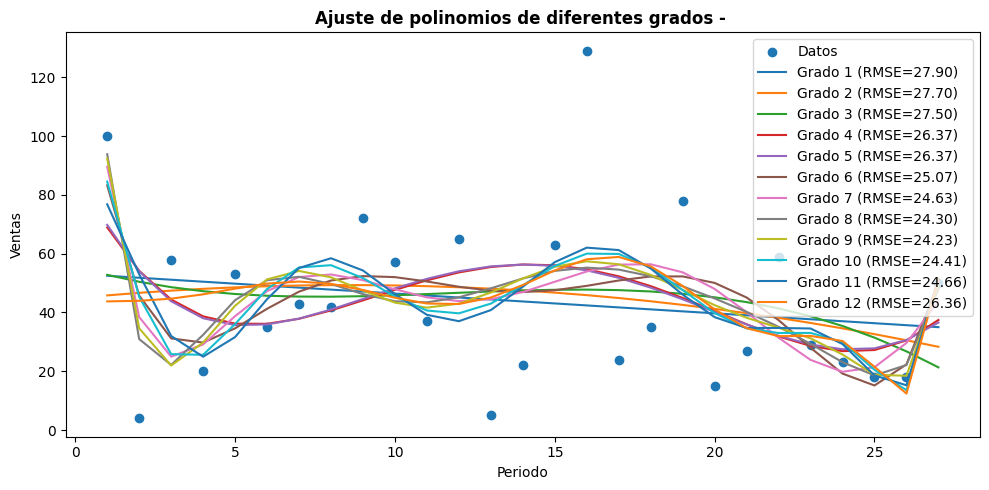

In [336]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={root_mean_squared_error(y, y_pred):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [410]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_9(j, i, train_td, nombres_productos[2])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 351.88
Tamaño de ventana = 36, periodos evaluados = 3, RMSE = 319.31


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [411]:
datos_diff_1_12 = train_td[nombres_productos[2]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -3.5273985393548353, p-value: 0.007310699357498395
KPSS Statistic: 0.4379363099221835, p-value: 0.06080331468871401


In [413]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[2]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 2         | -19.51    | 0.907     | 0.4403    | 0.277     |
| 20        | -18.12    | 1.795     | 0.3381    | 0.3503    |


In [414]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 0, D = 2, Q = 0, RMSE = 18.12


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto 1, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 15.89 (w = 24, f = 3, rezagos = 5)

* Suavizacion Holt-Winters: RMSE = 2.95 (w = 24, f = 3, alfa = 0.11, beta = 0.65, gamma = 0.74, error = mul, trend = None, seasonal = mul)

* Modelo polinomio orden 9: RMSE = 287.5 (w = 24, f = 3)

* ARIMA(0,2,0): RMSE = 18.12 (w = 24, f = 3)

**En este caso el mejor modelo de todos es el Holt-Winters que tiene un RMSE de 2.95**

2024-05-01    29.798052
2024-06-01    55.221029
2024-07-01    28.891376
Freq: MS, Name: simulation, dtype: float64


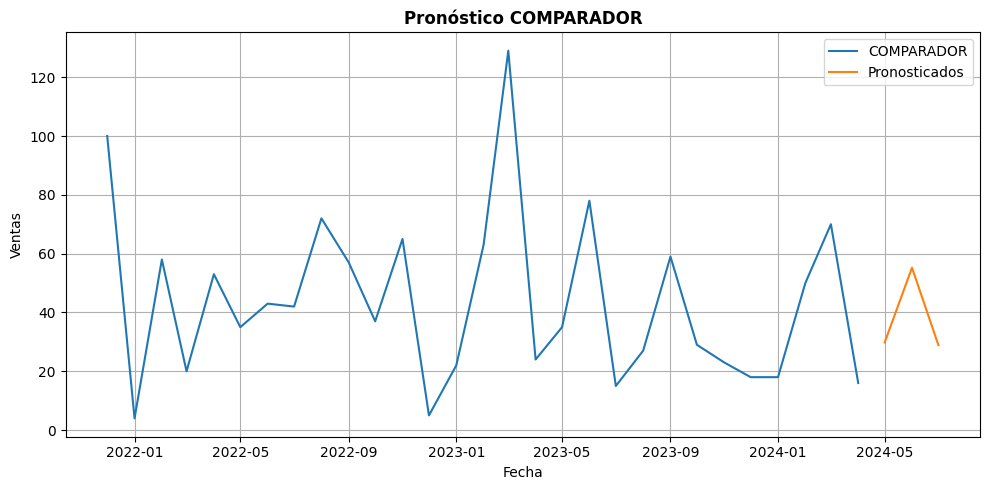

In [420]:
forecast_all = []

model = ETSModel(endog = df_grouped3[nombres_productos[2]], error = 'mul' , trend = None , seasonal = 'mul')
ets_result = model.fit()

forecast = ets_result.forecast(steps=Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped3.index,df_grouped3[nombres_productos[2]],label=nombres_productos[2])
plt.plot(forecast.index,forecast,label="Pronosticados")
plt.title('Pronóstico ' + nombres_productos[2], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()
 

## PRONOSTICOS PARA PRODUCTO 4

In [421]:
Ventana_1 = 24
Ventana_2 = 36

train_len = df_grouped4.shape[0]-Periodos_pronostico
train_td = df_grouped4[:train_len]
test_td = df_grouped4[train_len:]


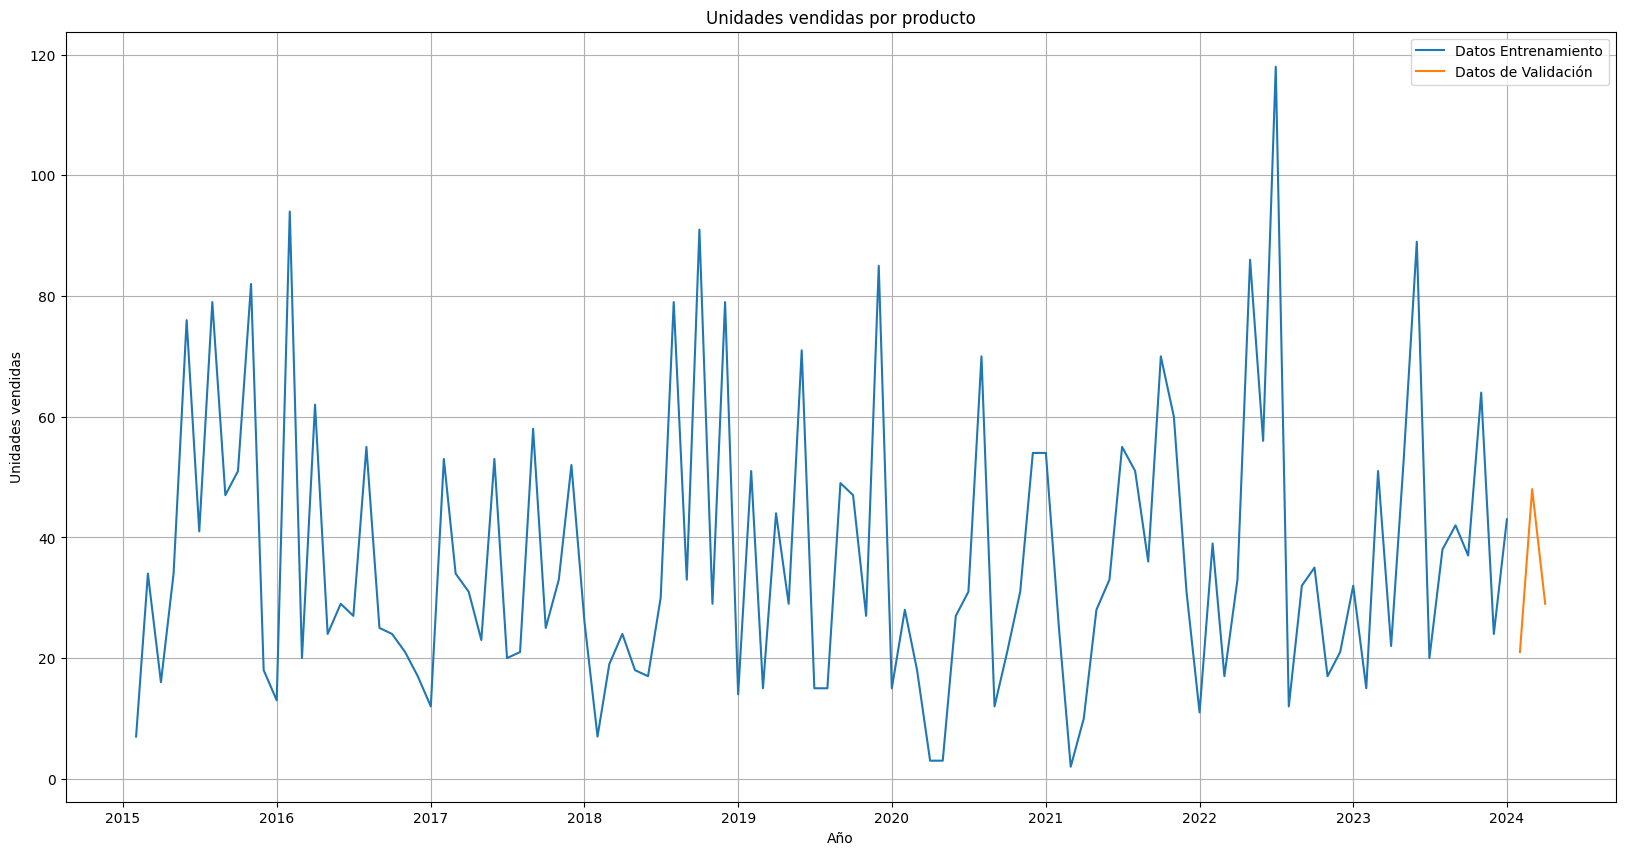

In [422]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(train_td[nombres_productos[3]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[3]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [423]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[3]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [424]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto 1 con un RMSE mínimo de 14.37 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 5


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [426]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[3]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 5         | -31.38    | 0.8689    | 0.8867    | 0.08504   | 0.04827   | 0.3397    | 1.756     |
| 15        | -20.78    | 0.3271    | 0.4659    | 0.3427    | 0.01      | 0.002419  | 2.0       |
| 20        | -14.57    | 0.02766   | 0.01      | 1.0       | 0.4023    | 0.2911    | 0.8107    |

Modelo Holt-Winters para el Producto, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 12        | -24.27    | 0.5086    | 0.6917    | 0.1717    | 0.6222    | 0.4006    | 1.668     |
| 30        | -20.84    | 0.1579    | 0.01  

In [427]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto 1:

w = 24, fore = 3, alfa = 0.03, beta = 0.01, gamma = 0.4, error = mul, trend = mul, seasonal = add, RMSE = 14.57
w = 36, fore = 3, alfa = 0.04, beta = 0.03, gamma = 0.59, error = add, trend = None, seasonal = None, RMSE = 17.22


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación) 

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [428]:
runstest_1samp(train_td[nombres_productos[3]], correction=False)

(0.5454635173764301, 0.5854347655132227)

In [429]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[3]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue    bp_stat  bp_pvalue                          lb_ho  \
1    0.091496   0.762284   0.089000   0.765452  no_rechazo_ho/no_hay_autocorr   
2    3.748591   0.153463   3.613111   0.164219  no_rechazo_ho/no_hay_autocorr   
3    3.792738   0.284732   3.655251   0.301178  no_rechazo_ho/no_hay_autocorr   
4    5.513500   0.238545   5.282153   0.259552  no_rechazo_ho/no_hay_autocorr   
5    7.268103   0.201453   6.925099   0.226271  no_rechazo_ho/no_hay_autocorr   
6    7.295355   0.294394   6.950370   0.325461  no_rechazo_ho/no_hay_autocorr   
7   12.006745   0.100337  11.276282   0.127014  no_rechazo_ho/no_hay_autocorr   
8   13.894696   0.084552  12.992601   0.112104  no_rechazo_ho/no_hay_autocorr   
9   15.059324   0.089319  14.040767   0.120882  no_rechazo_ho/no_hay_autocorr   
10  17.109377   0.071979  15.867178   0.103498  no_rechazo_ho/no_hay_autocorr   
11  18.034522   0.080783  16.682987   0.117609  no_rechazo_ho/no_hay_autocorr   
12  18.091822   0.112931  16.732994   0.159920  no_rechazo_ho/no_hay_autocorr   
13  18.111566   0.153329  16.750046   0.210984  no_rechazo_ho/no_hay_autocorr   
14  18.112400   0.201709  16.750759   0.269703  no_rechazo_ho/no_hay_autocorr   
15  21.989746   0.108073  20.028878   0.170828  no_rechazo_ho/no_hay_autocorr   
16  21.991820   0.143456  20.030613   0.218845  no_rechazo_ho/no_hay_autocorr   
17  25.494261   0.084181  22.928087   0.151607  no_rechazo_ho/no_hay_autocorr   
18  25.501557   0.111713  22.934057   0.193137  no_rechazo_ho/no_hay_autocorr   
19  25.571260   0.142585  22.990453   0.237763  no_rechazo_ho/no_hay_autocorr   
20  25.787362   0.172950  23.163334   0.280846  no_rechazo_ho/no_hay_autocorr   

                            bp_ho  
1   no_rechazo_ho/no_hay_autocorr  
2   no_rechazo_ho/no_hay_autocorr  
3   no_rechazo_ho/no_hay_autocorr  
4   no_rechazo_ho/no_hay_autocorr  
5   no_rechazo_ho/no_hay_autocorr  
6   no_rechazo_ho/no_hay_autocorr  
7   no_rechazo_ho/no_hay_autocorr  
8   no_rechazo_ho/no_hay_autocorr  
9   no_rechazo_ho/no_hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11  no_rechazo_ho/no_hay_autocorr  
12  no_rechazo_ho/no_hay_autocorr  
13  no_rechazo_ho/no_hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17  no_rechazo_ho/no_hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [430]:
stats.shapiro(train_td[nombres_productos[3]])

ShapiroResult(statistic=0.9195220856755892, pvalue=6.434840581024933e-06)

In [431]:
stats.jarque_bera(train_td[nombres_productos[3]])

SignificanceResult(statistic=19.67814545008546, pvalue=5.3326736746963774e-05)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [358]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[3]]-train_td[nombres_productos[3]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue   bp_stat  bp_pvalue
1    0.809361   0.368309  0.787288   0.374922
2    3.418843   0.180970  3.301879   0.191870
3    3.920459   0.270182  3.780695   0.286140
4    3.995861   0.406566  3.851984   0.426408
5    4.566571   0.471026  4.386376   0.495228
6    4.571186   0.599863  4.390655   0.623967
7    5.304520   0.622855  5.063989   0.652154
8    5.307328   0.724280  5.066542   0.750441
9    5.407915   0.797399  5.157070   0.820407
10   5.611668   0.846766  5.338596   0.867443
11   6.431517   0.843078  6.061553   0.869226
12   6.577244   0.884241  6.188733   0.906271
13   7.050609   0.899525  6.597548   0.921684
14   7.154877   0.928576  6.686650   0.946117
15   7.423069   0.944830  6.913395   0.960009
16   7.952669   0.950263  7.356332   0.965766
17   8.828611   0.945486  8.080976   0.964784
18   9.844772   0.936855  8.912380   0.961738
19   9.959615   0.953935  9.005299   0.973391
20  10.290706   0.962589  9.270171   0.979561

#### **6.3 Normalidad**

In [359]:
stats.shapiro(train_td[nombres_productos[3]])

ShapiroResult(statistic=0.9195220856755892, pvalue=6.434840581024933e-06)

In [360]:
stats.jarque_bera(train_td[nombres_productos[3]])

SignificanceResult(statistic=19.67814545008546, pvalue=5.3326736746963774e-05)

#### **6.4 Modelo**

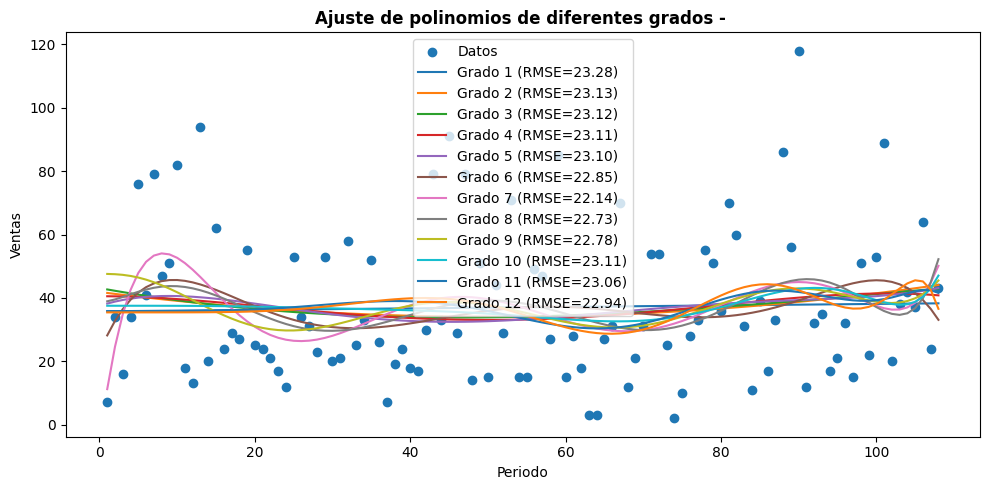

In [432]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={root_mean_squared_error(y, y_pred):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [433]:
# Funcion para evaluar modelo con polinomio de orden 10
def pol_ord_8(fore, w, data, objetivo):


    data = data
    y_obj = objetivo

    forecast_all = []

    for i in range(0,fore):
        train = data[(-w-fore+i):(-fore+i)]
        y = train[y_obj]
        x = np.linspace(1,train.shape[0],train.shape[0])
        train.loc[:,"x"] = x
        train.loc[:,"x2"] = x**2
        train.loc[:,"x3"] = x**3
        train.loc[:,"x4"] = x**4
        train.loc[:,"x5"] = x**5
        train.loc[:,"x6"] = x**6
        train.loc[:,"x7"] = x**7
        train.loc[:,"x8"] = x**8

        month_dummies = pd.get_dummies(train.index.month,drop_first=True, dtype='int').set_index(train.index)
        X = sm.add_constant( pd.concat([train[["x","x2","x3","x4","x5","x6","x7","x8"]],month_dummies],axis=1) )
        model = sm.OLS(y,X)
        season_pol = model.fit()

        h=1
        x_for= np.linspace((train.shape[0]+1),(train.shape[0]+h),h)
        x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5,x_for**6,x_for**7,x_for**8),axis=1), \
                                 columns=["x","x2","x3","x4","x5","x6","x7","x8","x9","x10"] )
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
        x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True, dtype='int').iloc[:h]
        X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1), has_constant='add')

        dt = season_pol.get_prediction(X_for).summary_frame(alpha = 0.05)
        y_prd = dt['mean']
        yprd_ci_lower = dt['obs_ci_lower']
        yprd_ci_upper = dt['obs_ci_upper']
        preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
        preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
        preds.set_index(range_dates,inplace=True)

        forecast_all.append(preds['Point_forecast'])

    test = data[-fore:]
    return root_mean_squared_error(test, forecast_all)

In [434]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 8 para el Producto:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_10(j, i, train_td, nombres_productos[3])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 8 para el Producto:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 325.84
Tamaño de ventana = 36, periodos evaluados = 3, RMSE = 128.57


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [364]:
datos_diff_1_12 = train_td[nombres_productos[3]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -3.558592359718662, p-value: 0.00660382133754166
KPSS Statistic: 0.25659960793278513, p-value: 0.1


In [435]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[3]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 3         | -19.24    | 0.5588    | 1.037     | 1.19      |
| 7         | -16.41    | 0.1515    | 1.932     | 1.479     |
| 9         | -15.81    | 0.05967   | 2.888     | 2.701     |
| 10        | -4.07     | 1.465     | 3.0       | 3.0       |
| 98        | -2.855    | 0.0       | 3.0       | 1.846     |


In [367]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 3, D = 0, Q = 2, RMSE = 2.85


In [436]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_2]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[3]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 3         | -18.82    | 0.5588    | 1.037     | 1.19      |
| 7         | -18.01    | 0.0       | 1.644     | 1.265     |
| 8         | -17.4     | 0.0       | 0.7273    | 1.931     |
| 9         | -16.7     | 0.0       | 1.634     | 2.764     |
| 16        | -10.9     | 1.003     | 1.53      | 3.0       |


In [437]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 36, fore = 3, P = 2, D = 1, Q = 3, RMSE = 10.9


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto 1, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 14.37 (w = 24, f = 3, rezagos = 5)

* Suavizacion Holt-Winters: RMSE = 14.57 (w = 24, f = 3, alfa = 0.03, beta = 0.01, gamma = 0.4, error = mul, trend = mul, seasonal = add)

* Modelo polinomio orden 8: RMSE = 128.57 (w = 36, f = 3)

* ARIMA(3,0,2): RMSE = 2.85 (w = 24, f = 3)

**En este caso el mejor modelo de todos es el ARIMA(3,0,2) que tiene un RMSE de 2.85**

2024-05-01    40.391571
2024-06-01    33.672868
2024-07-01    39.455102
Freq: MS, dtype: float64


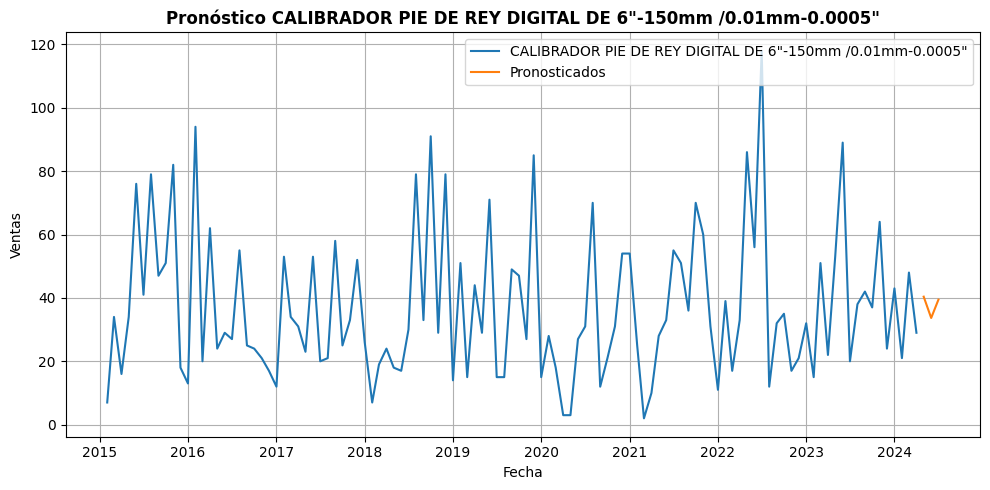

In [438]:
forecast_all = []

model = ARIMA(order=(3,0,2))
model.fit(df_grouped4)
forecast = model.predict(Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped4.index,df_grouped4[nombres_productos[3]],label=nombres_productos[3])
plt.plot(forecast.index,forecast,label="Pronosticados")
plt.title('Pronóstico ' + nombres_productos[3], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()
 

## PRONOSTICOS PARA PRODUCTO 5

In [439]:
Ventana_1 = 24
Ventana_2 = 36

train_len = df_grouped5.shape[0]-Periodos_pronostico
train_td = df_grouped5[:train_len]
test_td = df_grouped5[train_len:]


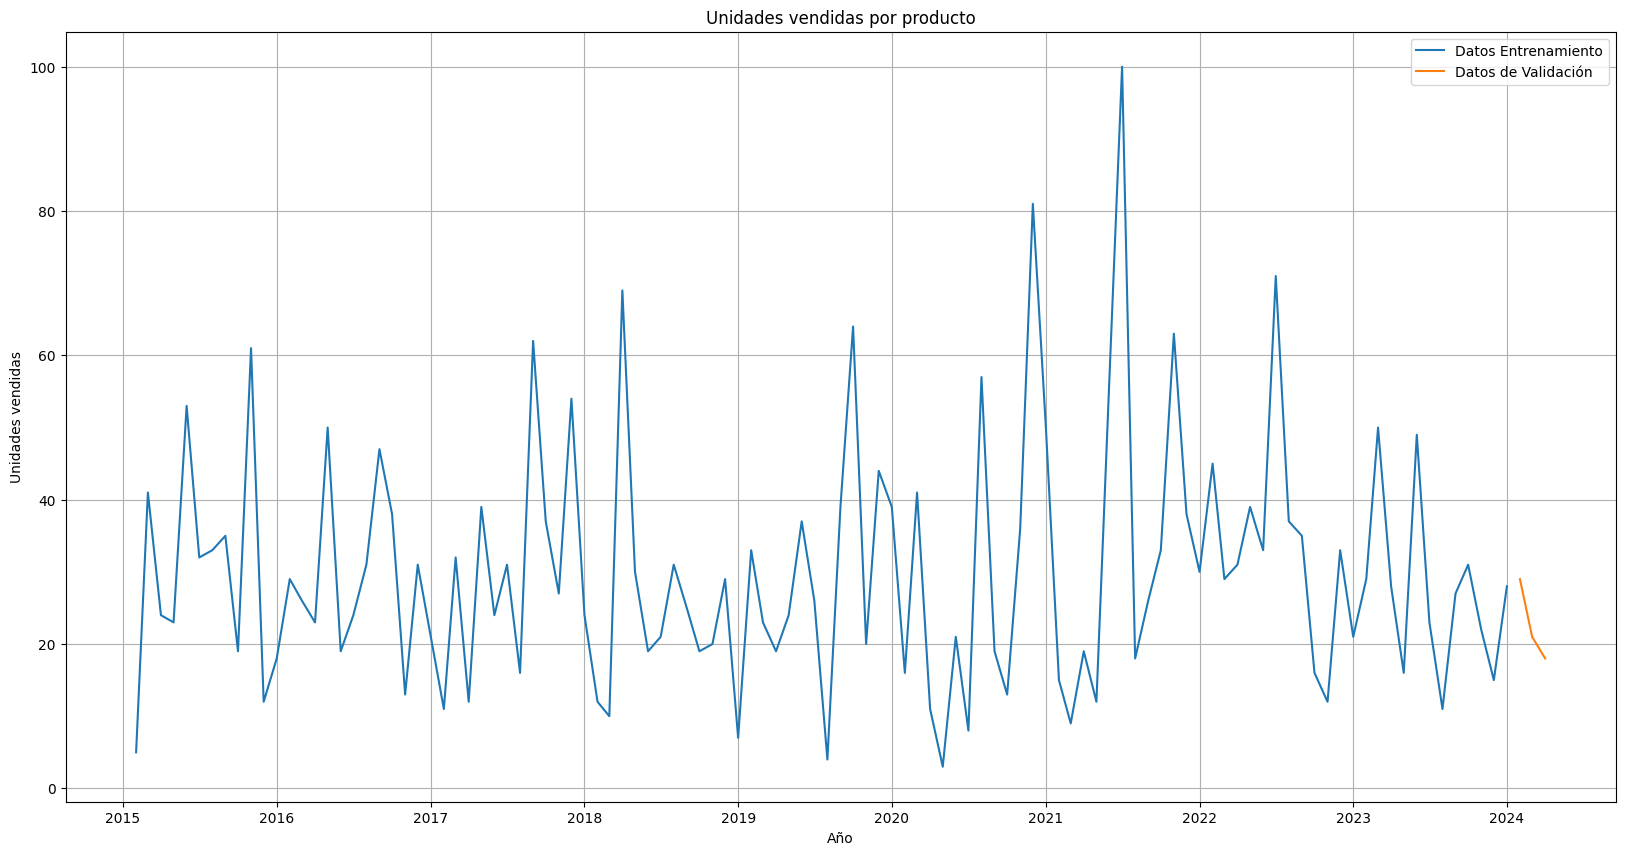

In [440]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(train_td[nombres_productos[4]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[4]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [441]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[4]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [442]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto 1 con un RMSE mínimo de 5.14 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 4


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [444]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[4]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 4         | -23.09    | 0.1476    | 0.2041    | 0.8007    | 0.9589    | 0.6268    | 1.385     |
| 5         | -20.22    | 0.8689    | 0.8867    | 0.08504   | 0.04827   | 0.3397    | 1.756     |
| 9         | -13.92    | 0.01      | 0.01      | 1.0       | 0.4202    | 0.4003    | 1.807     |
| 11        | -13.32    | 0.6901    | 0.5721    | 0.3291    | 0.7056    | 1.595     | 0.06075   |
| 12        | -11.04    | 0.99      | 0.2117    | 0.5663    | 0.9854    | 2.0       | 0.0       |
| 13        | -10.58    | 0.99      | 0.1395    | 0.1504    | 0.3036    | 2.0       | 0.0       |
| 15        | -7.527    | 0.3038    | 0.01      | 0.7105    | 0.4633    | 2.0       | 0.0       |
| 18        | -6.699    | 0.01  

In [445]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:

w = 24, fore = 3, alfa = 0.01, beta = 0.01, gamma = 0.01, error = add, trend = add, seasonal = None, RMSE = 6.09
w = 36, fore = 3, alfa = 0.01, beta = 0.06, gamma = 0.26, error = add, trend = mul, seasonal = None, RMSE = 5.21


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación) 

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [446]:
runstest_1samp(train_td[nombres_productos[4]], correction=False)

(0.6298276462948617, 0.5288073555145223)

In [447]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[4]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue    bp_stat  bp_pvalue                          lb_ho  \
1    0.046610   0.829071   0.045339   0.831383  no_rechazo_ho/no_hay_autocorr   
2    3.216470   0.200241   3.099931   0.212255  no_rechazo_ho/no_hay_autocorr   
3    3.221357   0.358739   3.104596   0.375778  no_rechazo_ho/no_hay_autocorr   
4    3.223155   0.521199   3.106296   0.540197  no_rechazo_ho/no_hay_autocorr   
5    3.223814   0.665524   3.106913   0.683507  no_rechazo_ho/no_hay_autocorr   
6    3.226840   0.779885   3.109719   0.794955  no_rechazo_ho/no_hay_autocorr   
7    4.277689   0.747295   4.074590   0.771147  no_rechazo_ho/no_hay_autocorr   
8    4.319431   0.827215   4.112537   0.846830  no_rechazo_ho/no_hay_autocorr   
9    7.957981   0.538386   7.387232   0.596871  no_rechazo_ho/no_hay_autocorr   
10   9.842844   0.454388   9.066474   0.525807  no_rechazo_ho/no_hay_autocorr   
11  13.127640   0.285065  11.963066   0.366426  no_rechazo_ho/no_hay_autocorr   
12  13.210693   0.353915  12.035549   0.442829  no_rechazo_ho/no_hay_autocorr   
13  13.364618   0.420058  12.168484   0.513879  no_rechazo_ho/no_hay_autocorr   
14  13.396365   0.495578  12.195613   0.590597  no_rechazo_ho/no_hay_autocorr   
15  13.793841   0.541219  12.531661   0.638422  no_rechazo_ho/no_hay_autocorr   
16  15.911897   0.459127  14.303126   0.576143  no_rechazo_ho/no_hay_autocorr   
17  19.057605   0.325236  16.905485   0.460787  no_rechazo_ho/no_hay_autocorr   
18  20.749960   0.292215  18.290138   0.436699  no_rechazo_ho/no_hay_autocorr   
19  20.889088   0.342962  18.402705   0.495707  no_rechazo_ho/no_hay_autocorr   
20  21.142982   0.388760  18.605821   0.547565  no_rechazo_ho/no_hay_autocorr   

                            bp_ho  
1   no_rechazo_ho/no_hay_autocorr  
2   no_rechazo_ho/no_hay_autocorr  
3   no_rechazo_ho/no_hay_autocorr  
4   no_rechazo_ho/no_hay_autocorr  
5   no_rechazo_ho/no_hay_autocorr  
6   no_rechazo_ho/no_hay_autocorr  
7   no_rechazo_ho/no_hay_autocorr  
8   no_rechazo_ho/no_hay_autocorr  
9   no_rechazo_ho/no_hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11  no_rechazo_ho/no_hay_autocorr  
12  no_rechazo_ho/no_hay_autocorr  
13  no_rechazo_ho/no_hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17  no_rechazo_ho/no_hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [448]:
stats.shapiro(train_td[nombres_productos[4]])

ShapiroResult(statistic=0.9202439590344537, pvalue=7.051966003479791e-06)

In [449]:
stats.jarque_bera(train_td[nombres_productos[4]])

SignificanceResult(statistic=47.480696933911226, pvalue=4.894379744882649e-11)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [450]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[4]]-train_td[nombres_productos[4]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.010531   0.918264   0.010244   0.919383
2    0.153913   0.925930   0.148412   0.928481
3    0.583752   0.900142   0.558713   0.905816
4    2.606817   0.625616   2.471429   0.649759
5    2.622883   0.757885   2.486473   0.778531
6    2.654504   0.850791   2.515794   0.866696
7   15.360995   0.031641  14.182662   0.048026
8   15.547499   0.049334  14.352212   0.073035
9   15.821840   0.070697  14.599119   0.102553
10  16.210073   0.093775  14.944999   0.134080
11  16.661440   0.118297  15.343022   0.167326
12  20.335289   0.061003  18.549291   0.100002
13  21.065131   0.071650  19.179609   0.117639
14  21.295803   0.094289  19.376729   0.151048
15  21.595965   0.118844  19.630502   0.186570
16  21.742241   0.151711  19.752842   0.231559
17  22.774219   0.156746  20.606569   0.244384
18  23.225945   0.182056  20.976163   0.280617
19  23.418306   0.219419  21.131801   0.329564
20  23.796412   0.251398  21.434286   0.371979

#### **6.3 Normalidad**

In [451]:
stats.shapiro(train_td[nombres_productos[4]])

ShapiroResult(statistic=0.9202439590344537, pvalue=7.051966003479791e-06)

In [452]:
stats.jarque_bera(train_td[nombres_productos[4]])

SignificanceResult(statistic=47.480696933911226, pvalue=4.894379744882649e-11)

#### **6.4 Modelo**

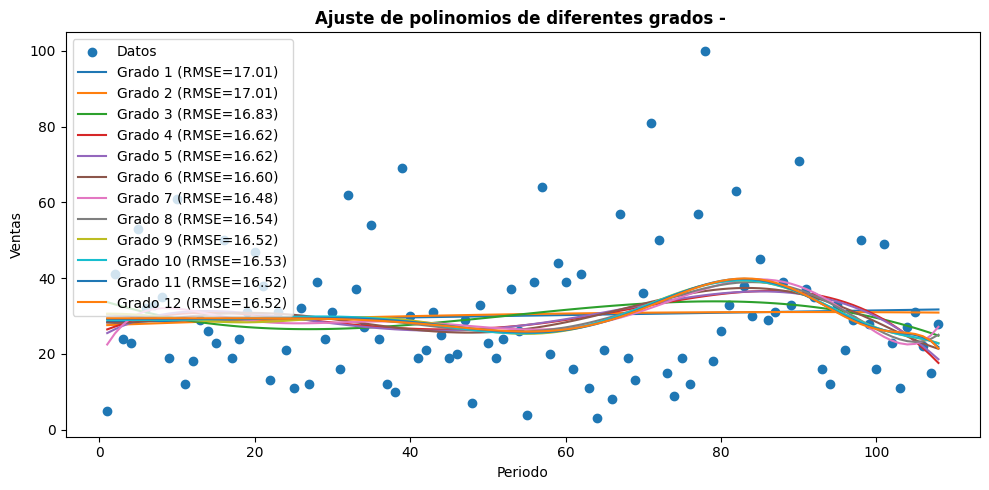

In [453]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={root_mean_squared_error(y, y_pred):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [454]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_9(j, i, train_td, nombres_productos[4])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 10 para el Producto 1:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 108.32
Tamaño de ventana = 36, periodos evaluados = 3, RMSE = 76.14


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [456]:
datos_diff_1_12 = train_td[nombres_productos[4]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -3.5691175189613764, p-value: 0.006379634350089096
KPSS Statistic: 0.13850153228331732, p-value: 0.1


In [457]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[4]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 3         | -6.26     | 0.5588    | 1.037     | 1.19      |
| 9         | -4.432    | 0.6825    | 0.4668    | 2.842     |


In [458]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 0, D = 1, Q = 3, RMSE = 4.43


In [459]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_2]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[4]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto 1, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 5         | -4.435    | 0.6134    | 2.634     | 0.08216   |
| 38        | -3.943    | 3.0       | 0.0       | 3.0       |


In [460]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 36, fore = 3, P = 0, D = 3, Q = 3, RMSE = 3.94


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 5.14 (w = 24, f = 3, rezagos = 4)

* Suavizacion Holt-Winters: RMSE = 5.21 (w = 36, f = 3, alfa = 0.01, beta = 0.06, gamma = 0.26, error = add, trend = mul, seasonal = None)

* Modelo polinomio orden 10: RMSE = 76.14 (w = 36, f = 3)

* ARIMA(0,3,3): RMSE = 3.94 (w = 36, f = 3)

**En este caso el mejor modelo de todos es el ARIMA(0,3,3) que tiene un RMSE de 3.94**

2024-05-01    22.005318
2024-06-01    21.124341
2024-07-01    20.205276
Freq: MS, dtype: float64


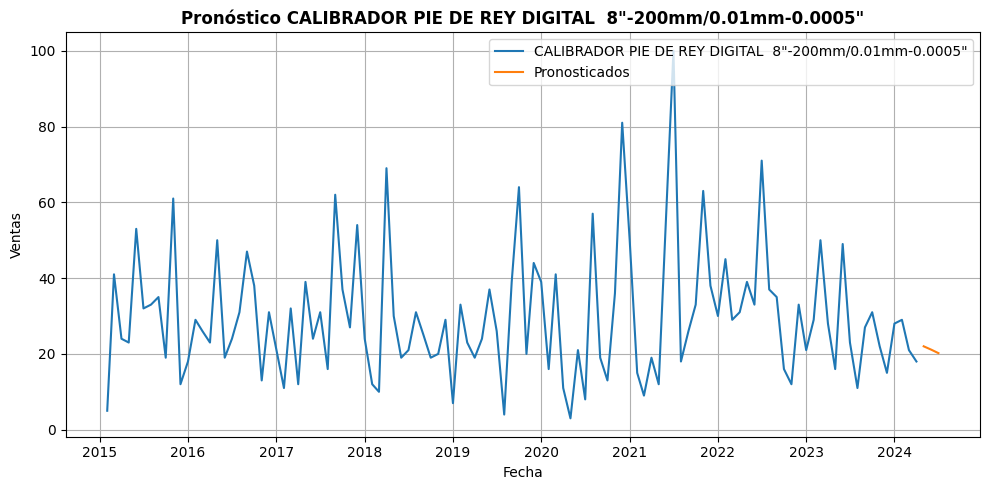

In [461]:
forecast_all = []

model = ARIMA(order=(0,3,3))
model.fit(df_grouped5)
forecast = model.predict(Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped5.index,df_grouped5[nombres_productos[4]],label=nombres_productos[4])
plt.plot(forecast.index,forecast,label="Pronosticados")
plt.title('Pronóstico ' + nombres_productos[4], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()
 